# Quick start: initializing, adding data, runing and saving your PyWGCNA

First, make sure to [install PyWGCNA](https://github.com/mortazavilab/PyWGCNA#readme).

I encourage you to look at [Data input, cleaning and pre-processing tutorial](Data%20format.md) before running PyWGCNA.

Then, download the example data from [here](https://github.com/mortazavilab/PyWGCNA/raw/main/tutorials/5xFAD_paper.zip) and decompress it.

For this tutorial, we will be using the gene expression matrix of 5xFAD mouse from the [MODEL-AD](https://www.model-ad.org/) project and [this paper](https://www.nature.com/articles/s41597-021-01054-y) in Scientific Data which has 5548 genes and 193 samples in four different time points.

## Setting up the PyWGCNA object

We use the TPM matrix to create a PyWGCNA object. The object serves as a container that contains expression data (i.e. TPM) and analysis results (like clustering, or visualizations) for an RNA-seq dataset. For a technical discussion of the PyWGCNA object structure, check out our [GitHub Wiki](https://github.com/mortazavilab/PyWGCNA/wiki). For example, the raw TPM matrix is stored in `GeneExp` class as an AnnData.

## **Note**

Depending on the amount of RAM on your machine, you may get an error during calculation of the TOM similarity matrix. In order to solve this problem, we suggest to remove one or two samples from each category or use another machine with more RAM.

In [1]:
import PyWGCNA
geneExp = '5xFAD_paper/expressionList.csv'
pyWGCNA_5xFAD = PyWGCNA.WGCNA(name='5xFAD', 
                              species='mus musculus', 
                              geneExpPath=geneExp, 
                              outputPath='',
                              save=True)
pyWGCNA_5xFAD.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...
Figure directory does not exist!
Creating figure directory!


ENSMUSG00000000003  ENSMUSG00000000028  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                 0.0                1.90   
X4mo_cortex_F_5xFADHEMI_431                 0.0                1.10   
X4mo_cortex_F_5xFADHEMI_433                 0.0                1.18   
X4mo_cortex_F_5xFADHEMI_434                 0.0                2.18   
X4mo_cortex_F_5xFADHEMI_511                 0.0                1.50   

                             ENSMUSG00000000031  ENSMUSG00000000037  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                0.00                0.13   
X4mo_cortex_F_5xFADHEMI_431                0.06                0.07   
X4mo_cortex_F_5xFADHEMI_433                0.07                0.13   
X4mo_cortex_F_5xFADHEMI_434                0.00                0.07   
X4mo_cortex_F_5xFADHEMI_511                0.10                0.14   

                             ENSMUSG00000000049  ENSMUSG00000000056  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                0.43           22.370001   
X4mo_cortex_F_5xFADHEMI_431                0.18           16.990000   
X4mo_cortex_F_5xFADHEMI_433                1.90           20.370001   
X4mo_cortex_F_5xFADHEMI_434                0.31           17.980000   
X4mo_cortex_F_5xFADHEMI_511                0.53           18.350000   

                             ENSMUSG00000000058  ENSMUSG00000000078  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430           24.240000           19.320000   
X4mo_cortex_F_5xFADHEMI_431           24.690001           23.879999   
X4mo_cortex_F_5xFADHEMI_433           28.059999           21.330000   
X4mo_cortex_F_5xFADHEMI_434           21.459999           15.060000   
X4mo_cortex_F_5xFADHEMI_511           20.180000           18.660000   

                             ENSMUSG00000000085  ENSMUSG00000000088  ...  \
sample_id                                                            ...   
X4mo_cortex_F_5xFADHEMI_430           33.410000          620.450012  ...   
X4mo_cortex_F_5xFADHEMI_431           31.400000          705.729980  ...   
X4mo_cortex_F_5xFADHEMI_433           32.139999          699.500000  ...   
X4mo_cortex_F_5xFADHEMI_434           27.600000          639.950012  ...   
X4mo_cortex_F_5xFADHEMI_511           26.430000          640.549988  ...   

                             ENSMUSG00000118383  ENSMUSG00000118384  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                0.75                 0.0   
X4mo_cortex_F_5xFADHEMI_431                0.67                 0.0   
X4mo_cortex_F_5xFADHEMI_433                0.91                 0.0   
X4mo_cortex_F_5xFADHEMI_434                0.11                 0.0   
X4mo_cortex_F_5xFADHEMI_511                0.64                 0.0   

                             ENSMUSG00000118385  ENSMUSG00000118386  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                0.00                0.00   
X4mo_cortex_F_5xFADHEMI_431                0.55                0.43   
X4mo_cortex_F_5xFADHEMI_433                0.00                0.19   
X4mo_cortex_F_5xFADHEMI_434                0.00                0.00   
X4mo_cortex_F_5xFADHEMI_511                1.38                0.00   

                             ENSMUSG00000118387  ENSMUSG00000118388  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                 0.0                 0.0   
X4mo_cortex_F_5xFADHEMI_431                 0.0                 0.0   
X4mo_cortex_F_5xFADHEMI_433                 0.0                 0.0   
X4mo_cortex_F_5xFADHEMI_434                 0.0                 0.0   
X4mo_cortex_F_5xFADHEMI_511                 0.0                 0.0   

          

## Pre-processing workflow

PyWGCNA allows you to easily preproces the data including removing genes with too many missing values or lowly-expressed genes across samples (by default we suggest to remove genes without that are expressed below 1 TPM) and removing samples with too many missing values. Keep in your mind that these options can be adjusted by changing `TPMcutoff` and `cut`

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



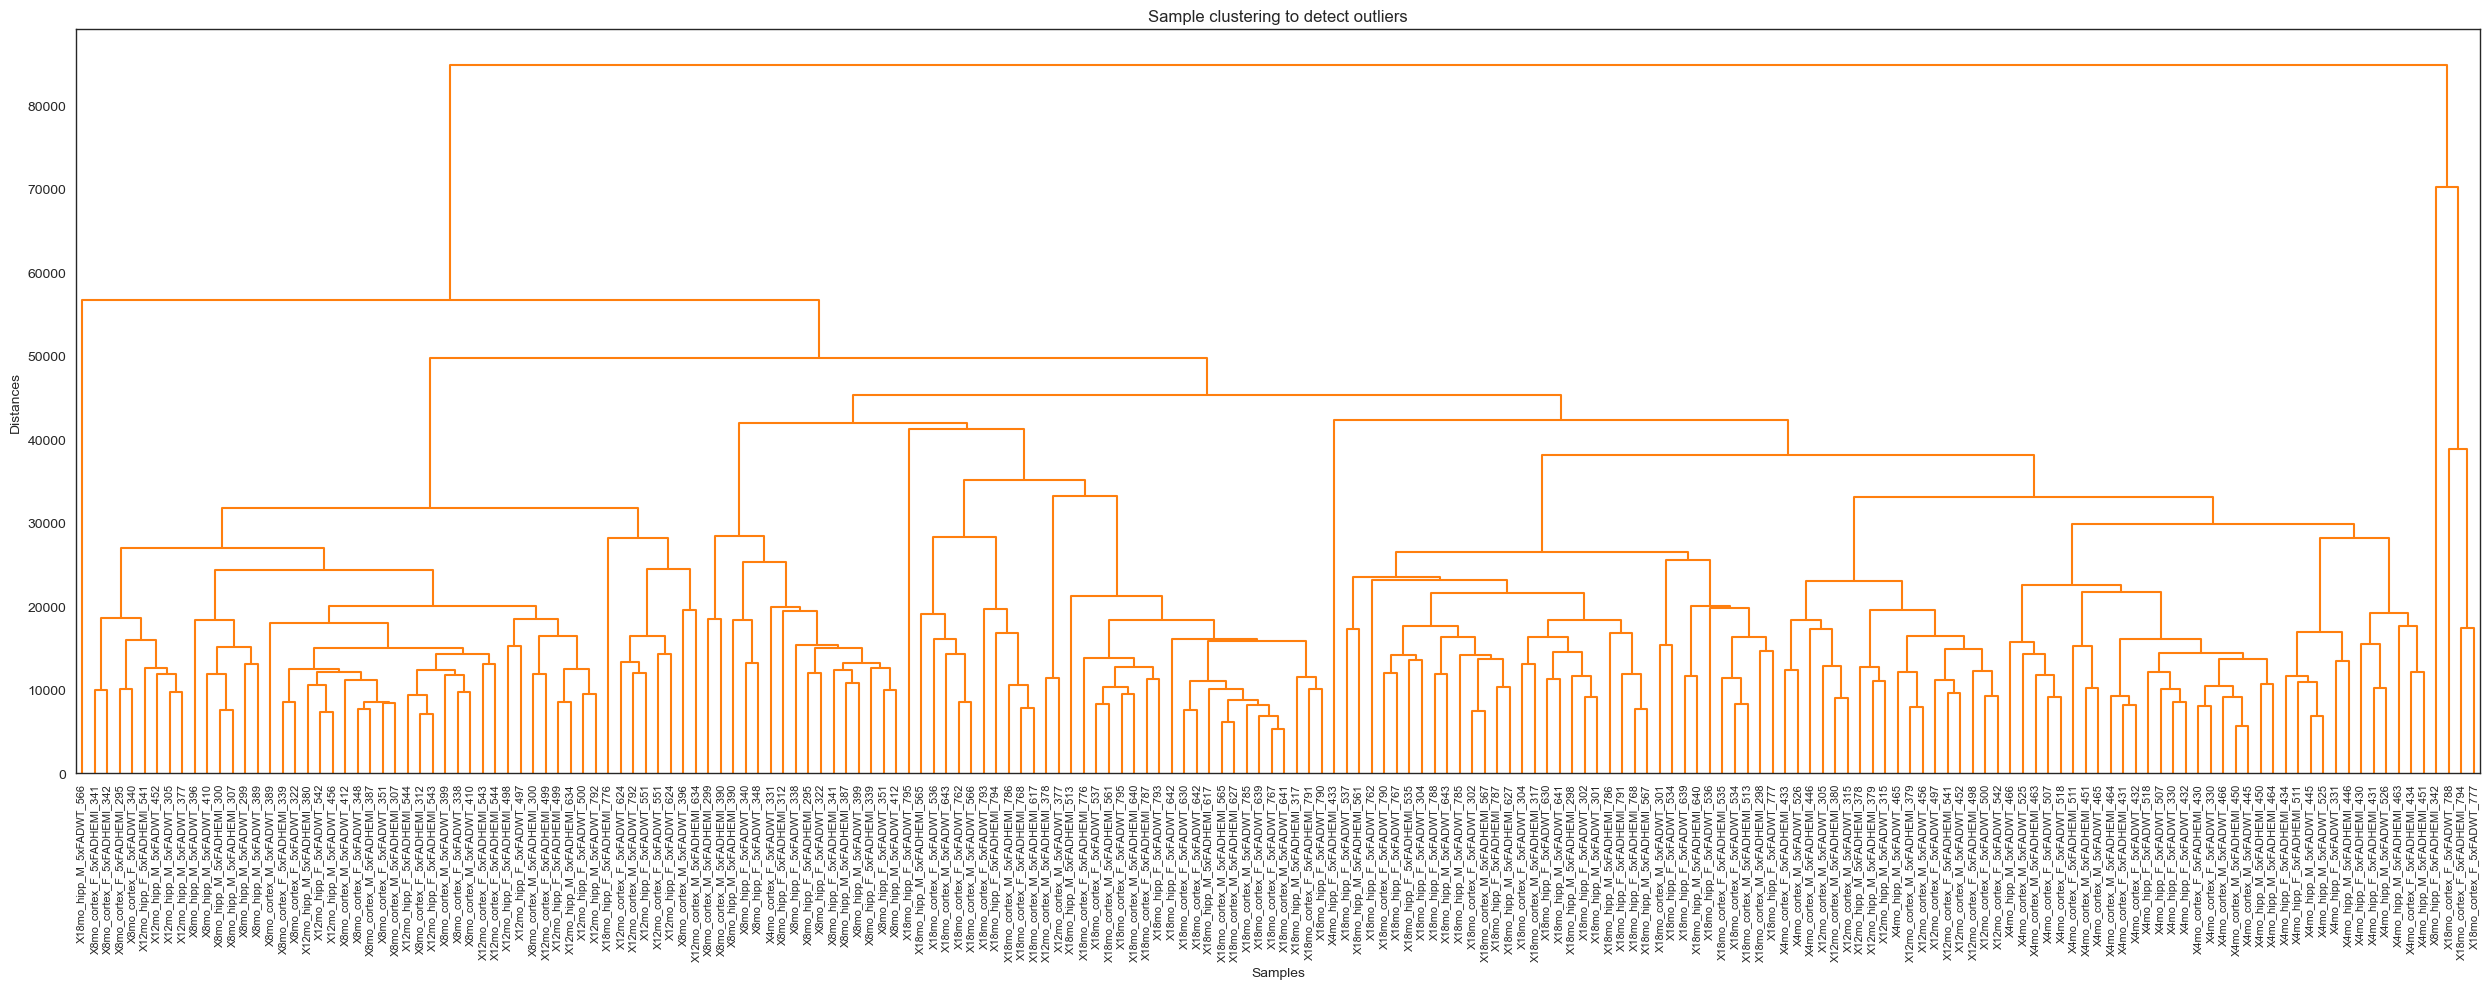

In [2]:
pyWGCNA_5xFAD.preprocess()

## Construction of the gene network and identification of modules

PyWGCNA compresses all the steps of network construction and module detection in one function called `findModules` which performs the following steps:
1. Choosing the soft-thresholding power: analysis of network topology
2. Co-expression similarity and adjacency
3. Topological Overlap Matrix (TOM)
4. Clustering using TOM
5. Merging of modules whose expression profiles are very similar

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1876
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.368857 -0.481613       0.701585  2444.750755  2260.416617   
1       2    0.7253  -0.99165       0.886361   840.665489   673.081242   
2       3  0.791986 -1.194264       0.946969   385.685335   258.451266   
3       4  0.835392   -1.3419       0.968446   207.404152   113.456084   
4       5  0.853842 -1.472183       0.973346   123.232581    54.784481   
5       6  0.870673 -1.553348       0.979584    78.455923    28.471239   
6       7  0.886736 -1.600869       0.986635    52.572016    15.594822   
7       8  0.896672 -1.639343       0.992373     36.65884     9.454046   
8       9  0.903531 -1.677747       0.994643    26.397061      6.02443   
9      10  0.906045 -1.706474       0.995895    19.521431     3.975959   
10     11  0.905582 -1.731076       0.994806    14.767291     2.623921   
11     13

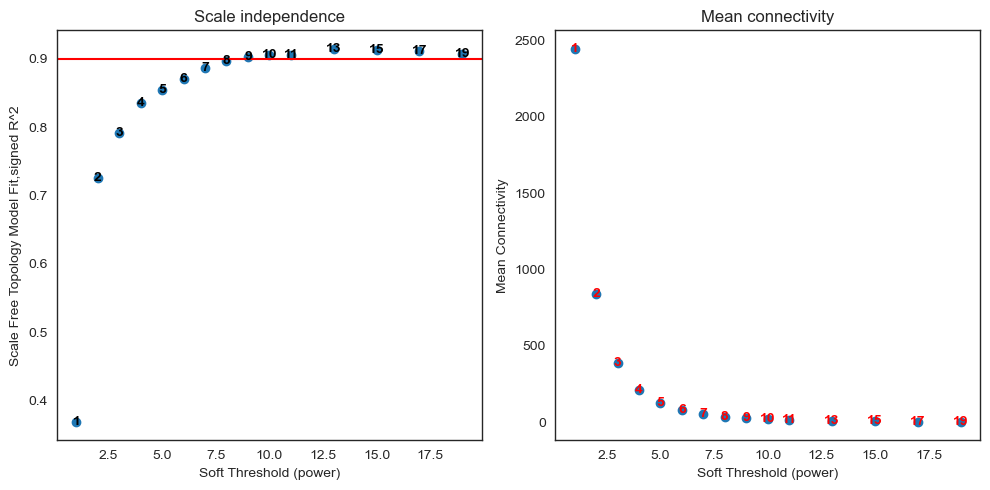

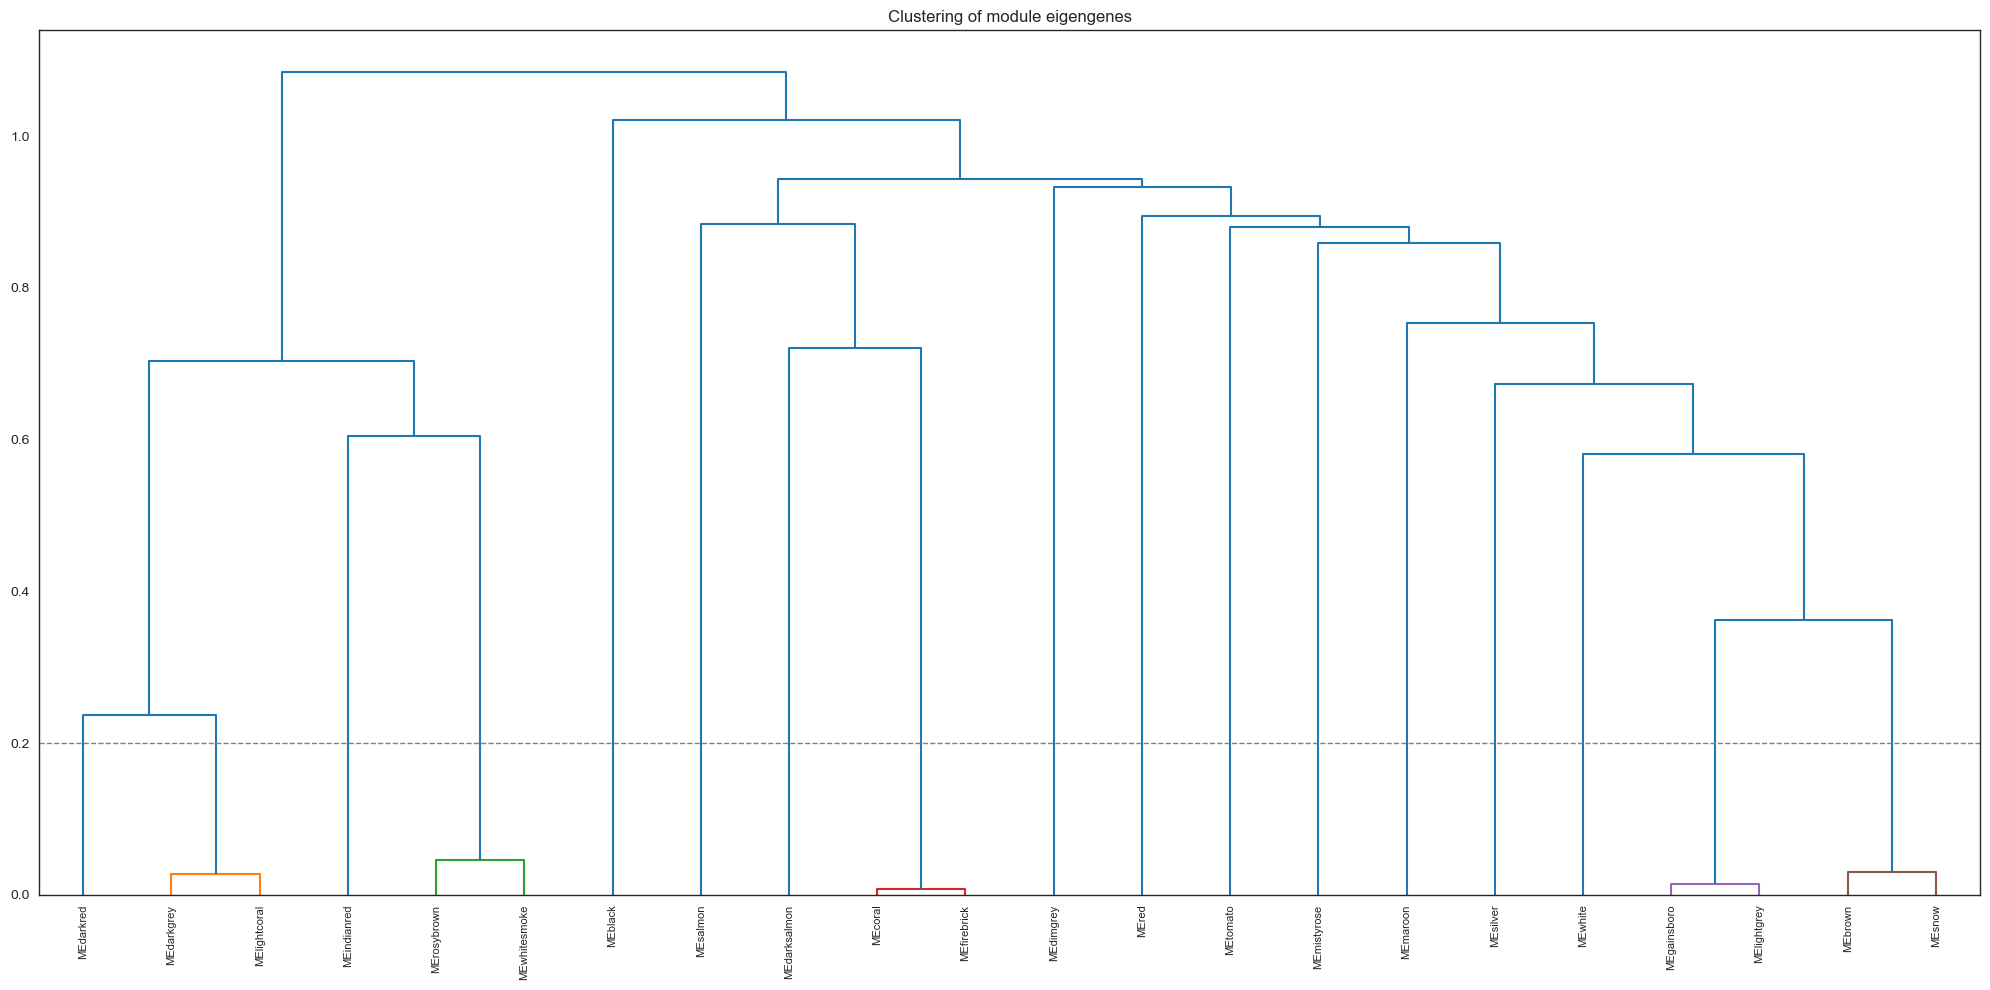

In [3]:
pyWGCNA_5xFAD.findModules()

We also can merge two previous steps by calling `runWGCNA()` function.

### Updating sample information and assiging color to them for dowstream analysis

In [7]:
pyWGCNA_5xFAD.updateSampleInfo(path='5xFAD_paper/sampleInfo.csv', sep=',')

# add color for metadata
pyWGCNA_5xFAD.setMetadataColor('Sex', {'Female': 'green',
                                       'Male': 'yellow'})
pyWGCNA_5xFAD.setMetadataColor('Genotype', {'5xFADWT': 'darkviolet',
                                            '5xFADHEMI': 'deeppink'})
pyWGCNA_5xFAD.setMetadataColor('Age', {'4mon': 'thistle',
                                       '8mon': 'plum',
                                       '12mon': 'violet',
                                       '18mon': 'purple'})
pyWGCNA_5xFAD.setMetadataColor('Tissue', {'Hippocampus': 'red',
                                          'Cortex': 'blue'})

### Updating gene information

espcially adding gene name for doing downstream analysis

In [8]:
geneList = PyWGCNA.getGeneList(dataset='mmusculus_gene_ensembl',
                               attributes=['ensembl_gene_id', 
                                           'external_gene_name', 
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'])


pyWGCNA_5xFAD.updateGeneInfo(geneList)

**note**: For doing downstream analysis, we keep aside the Gray modules which is the collection of genes that could not be assigned to any other module.

## Relating modules to external information and identifying important genes
PyWGCNA gather some important analysis after identifying modules in `analyseWGCNA()` function including:

1. Quantifying module–trait relationship 
2. Gene relationship to trait and modules
3. Gene-ontology analysis

Keep in your mind before you start analysis to add any sample or gene information.

For showing module relationship heatmap, PyWGCNA needs user to choose and set colors from [Matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for metadata by using `setMetadataColor()` function.

You also can select which data trait in which order you wish to show in module eigengene heatmap

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
GO directory does not exist!
Creating GO directory!
	Done..



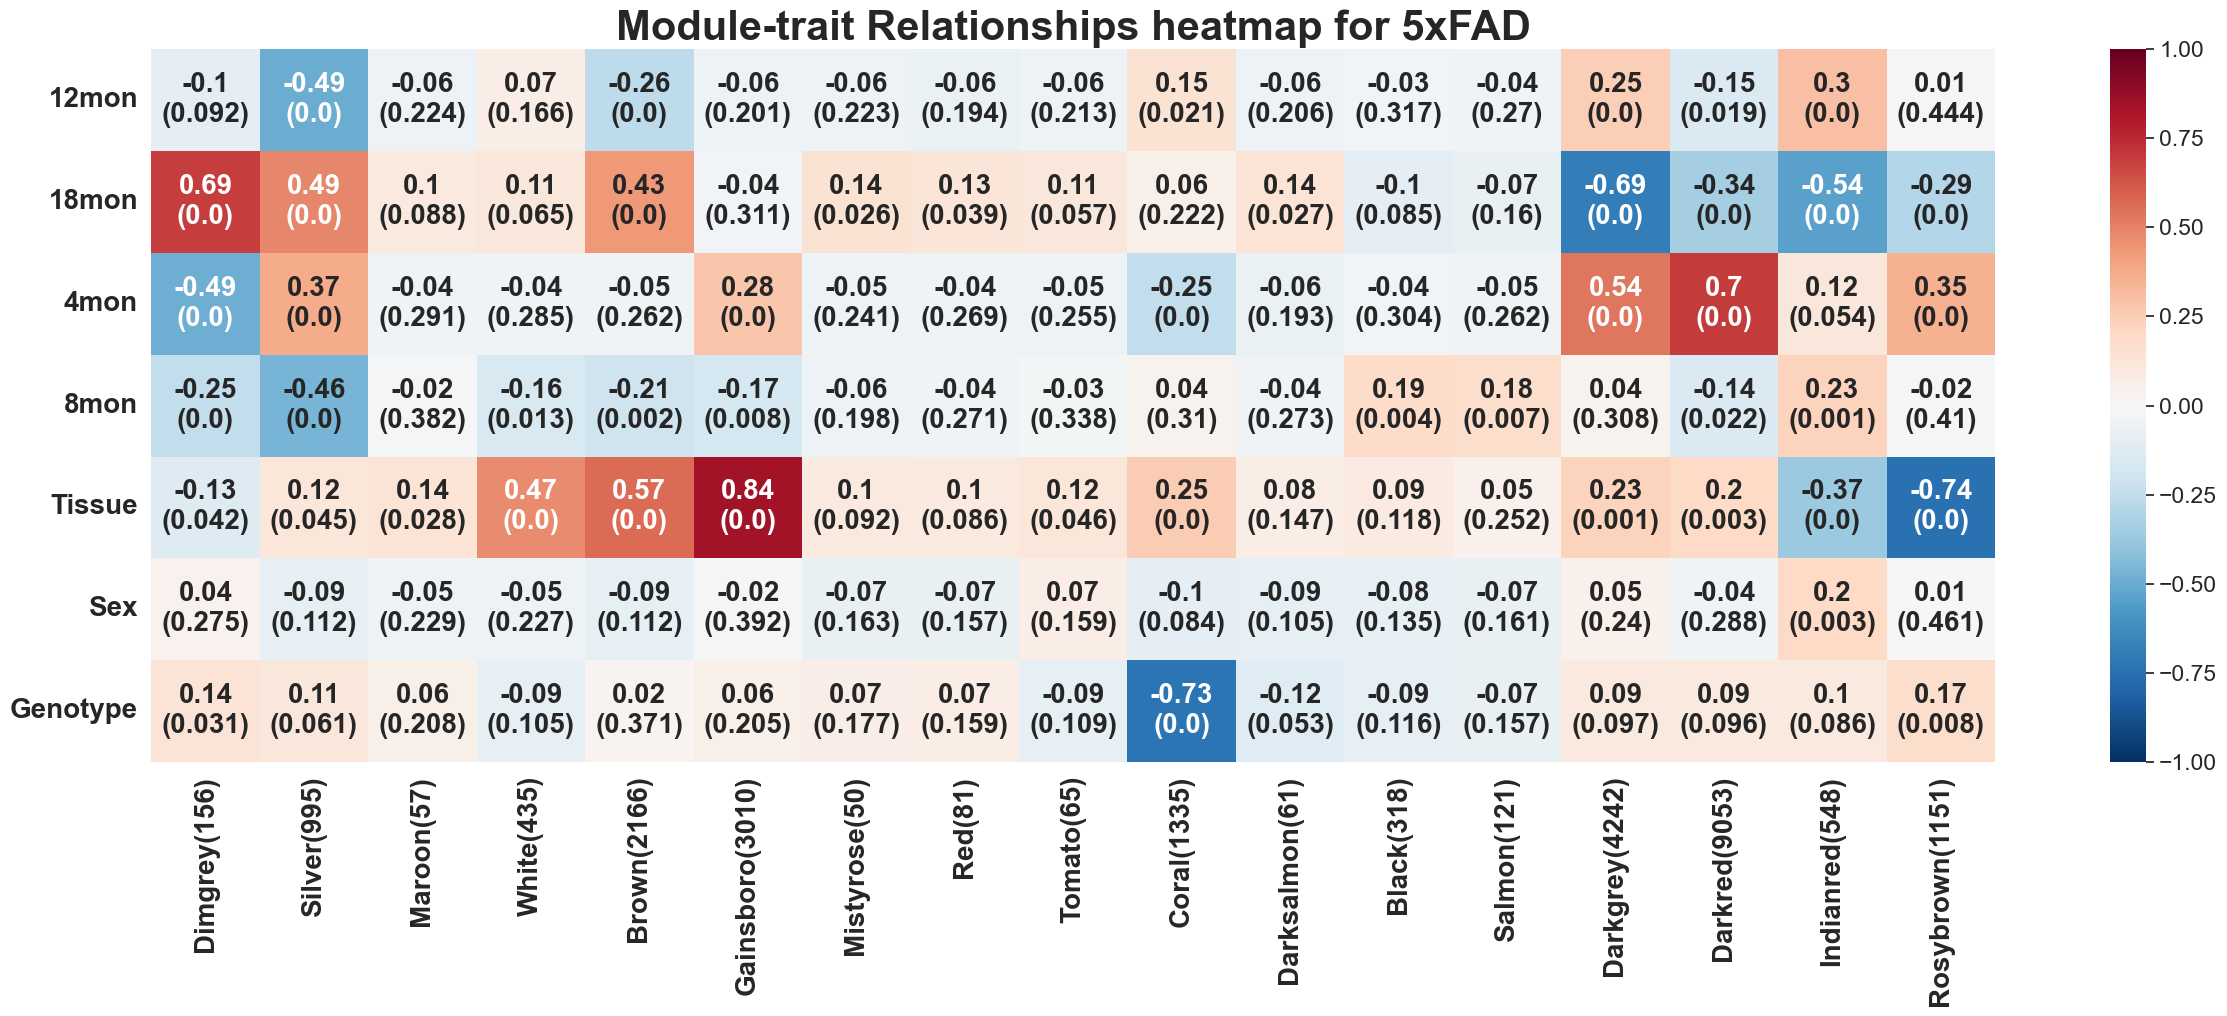

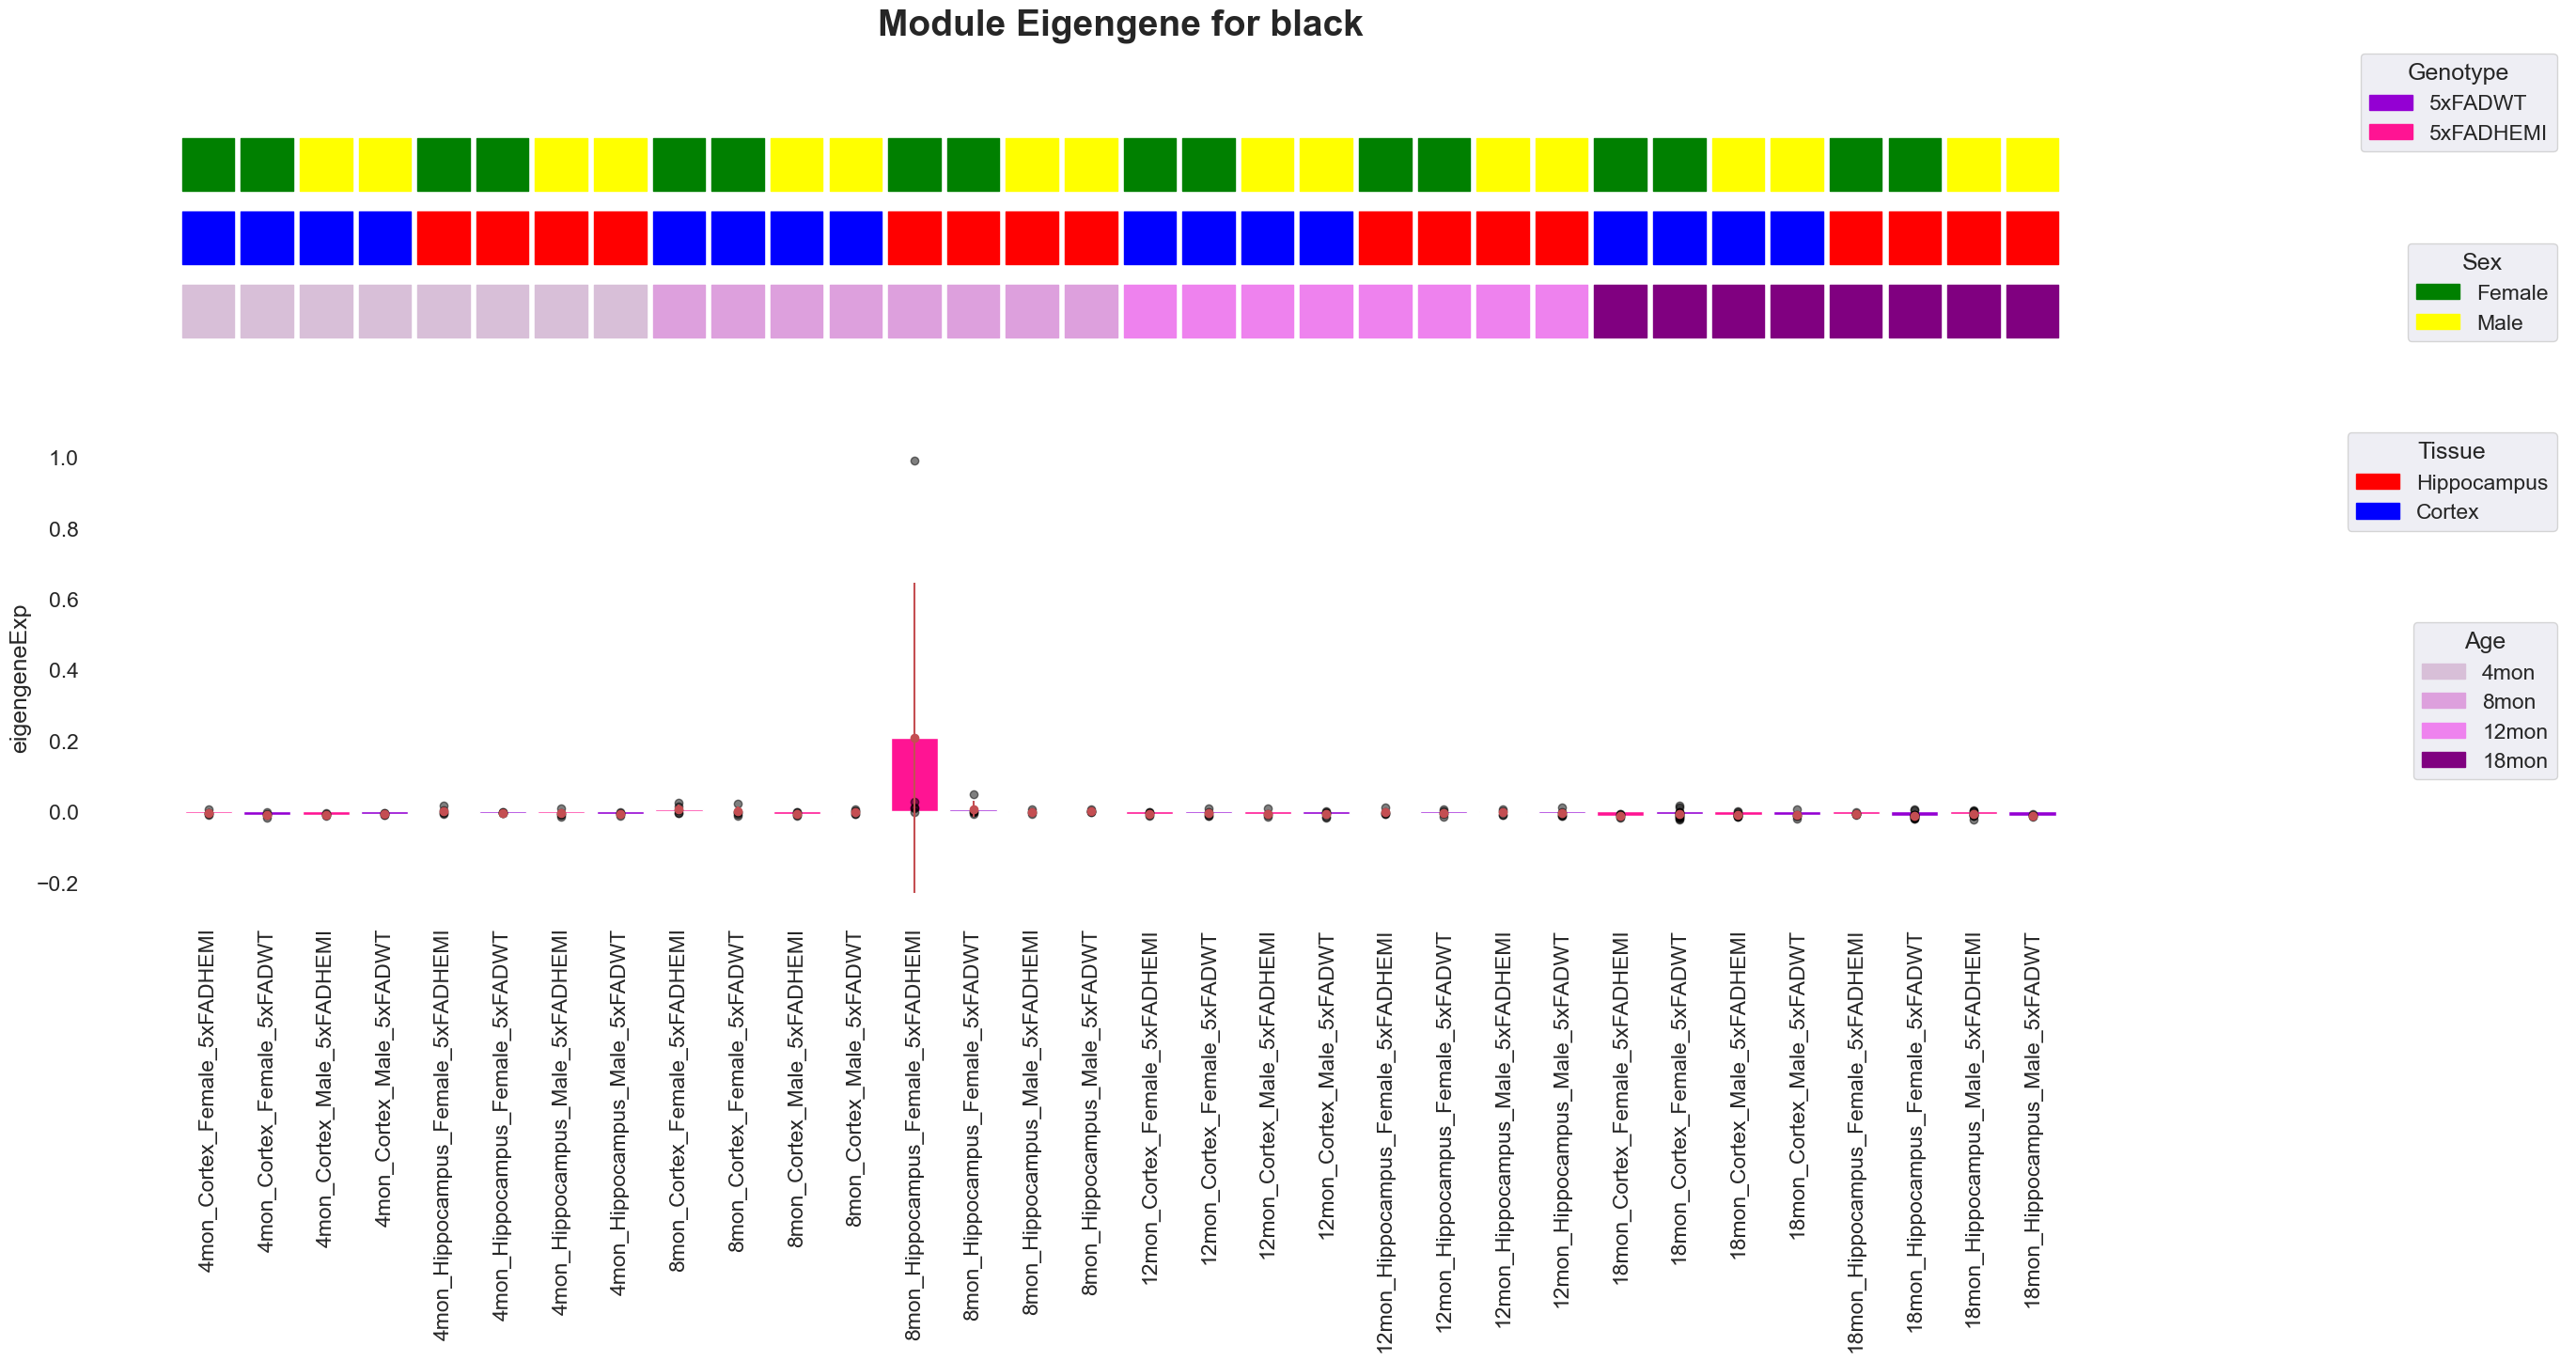

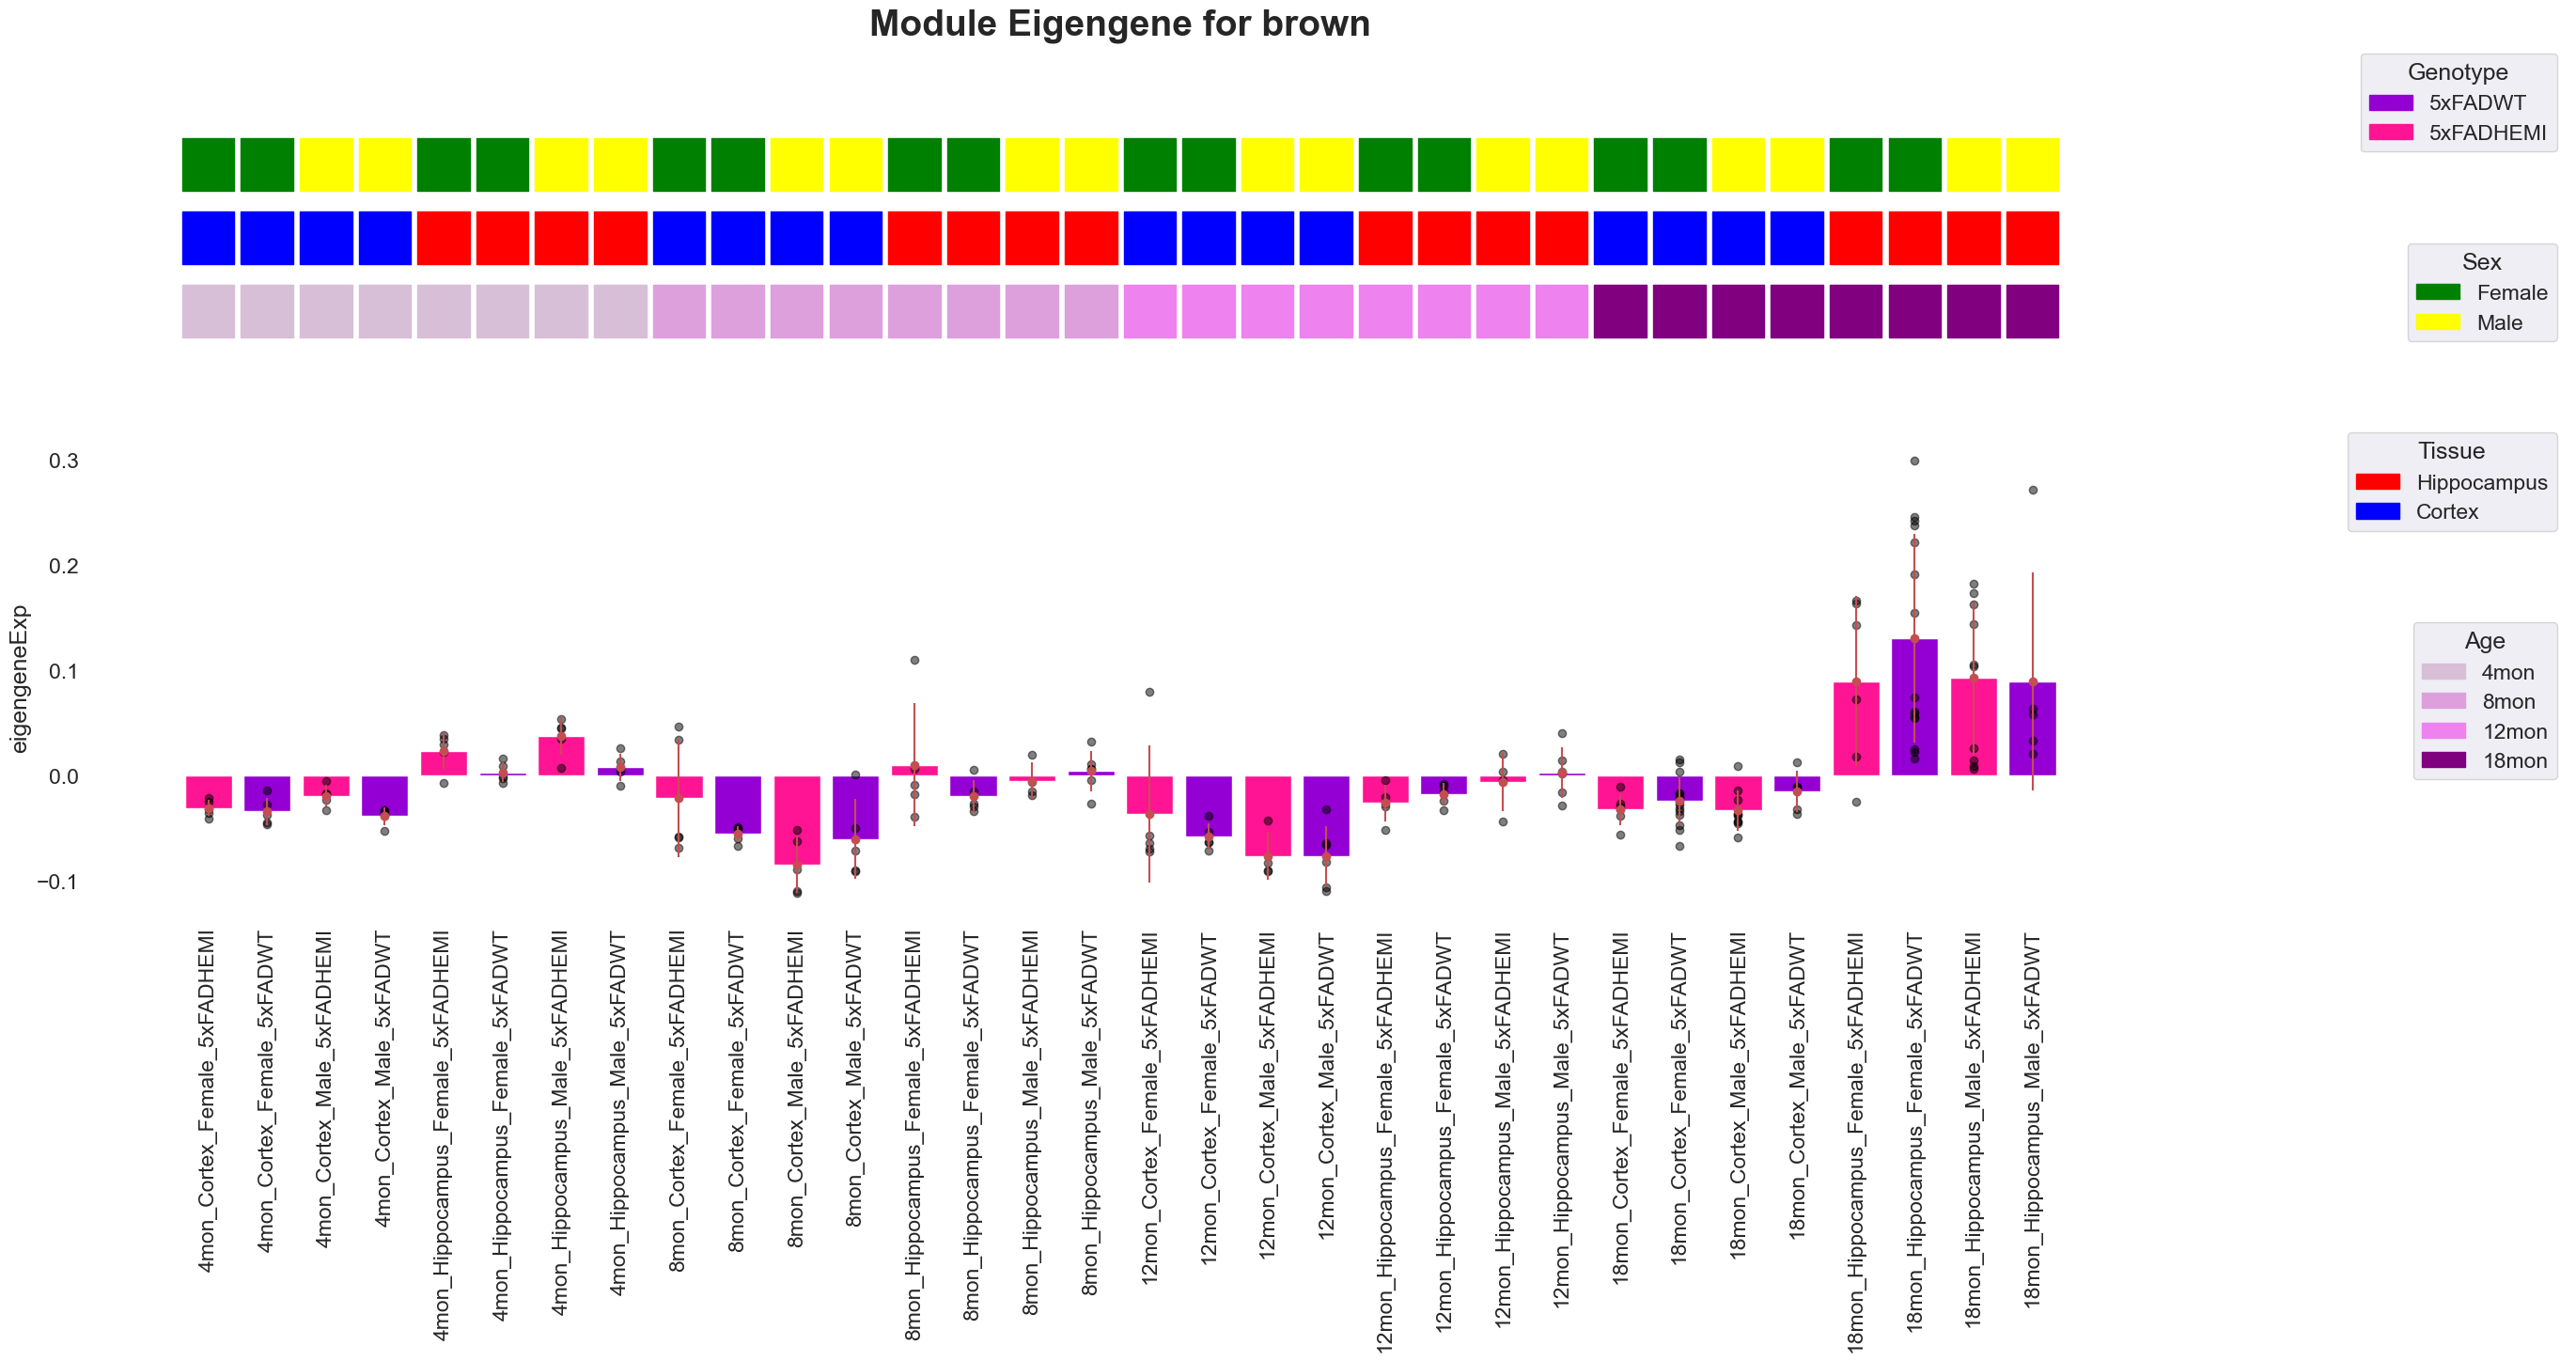

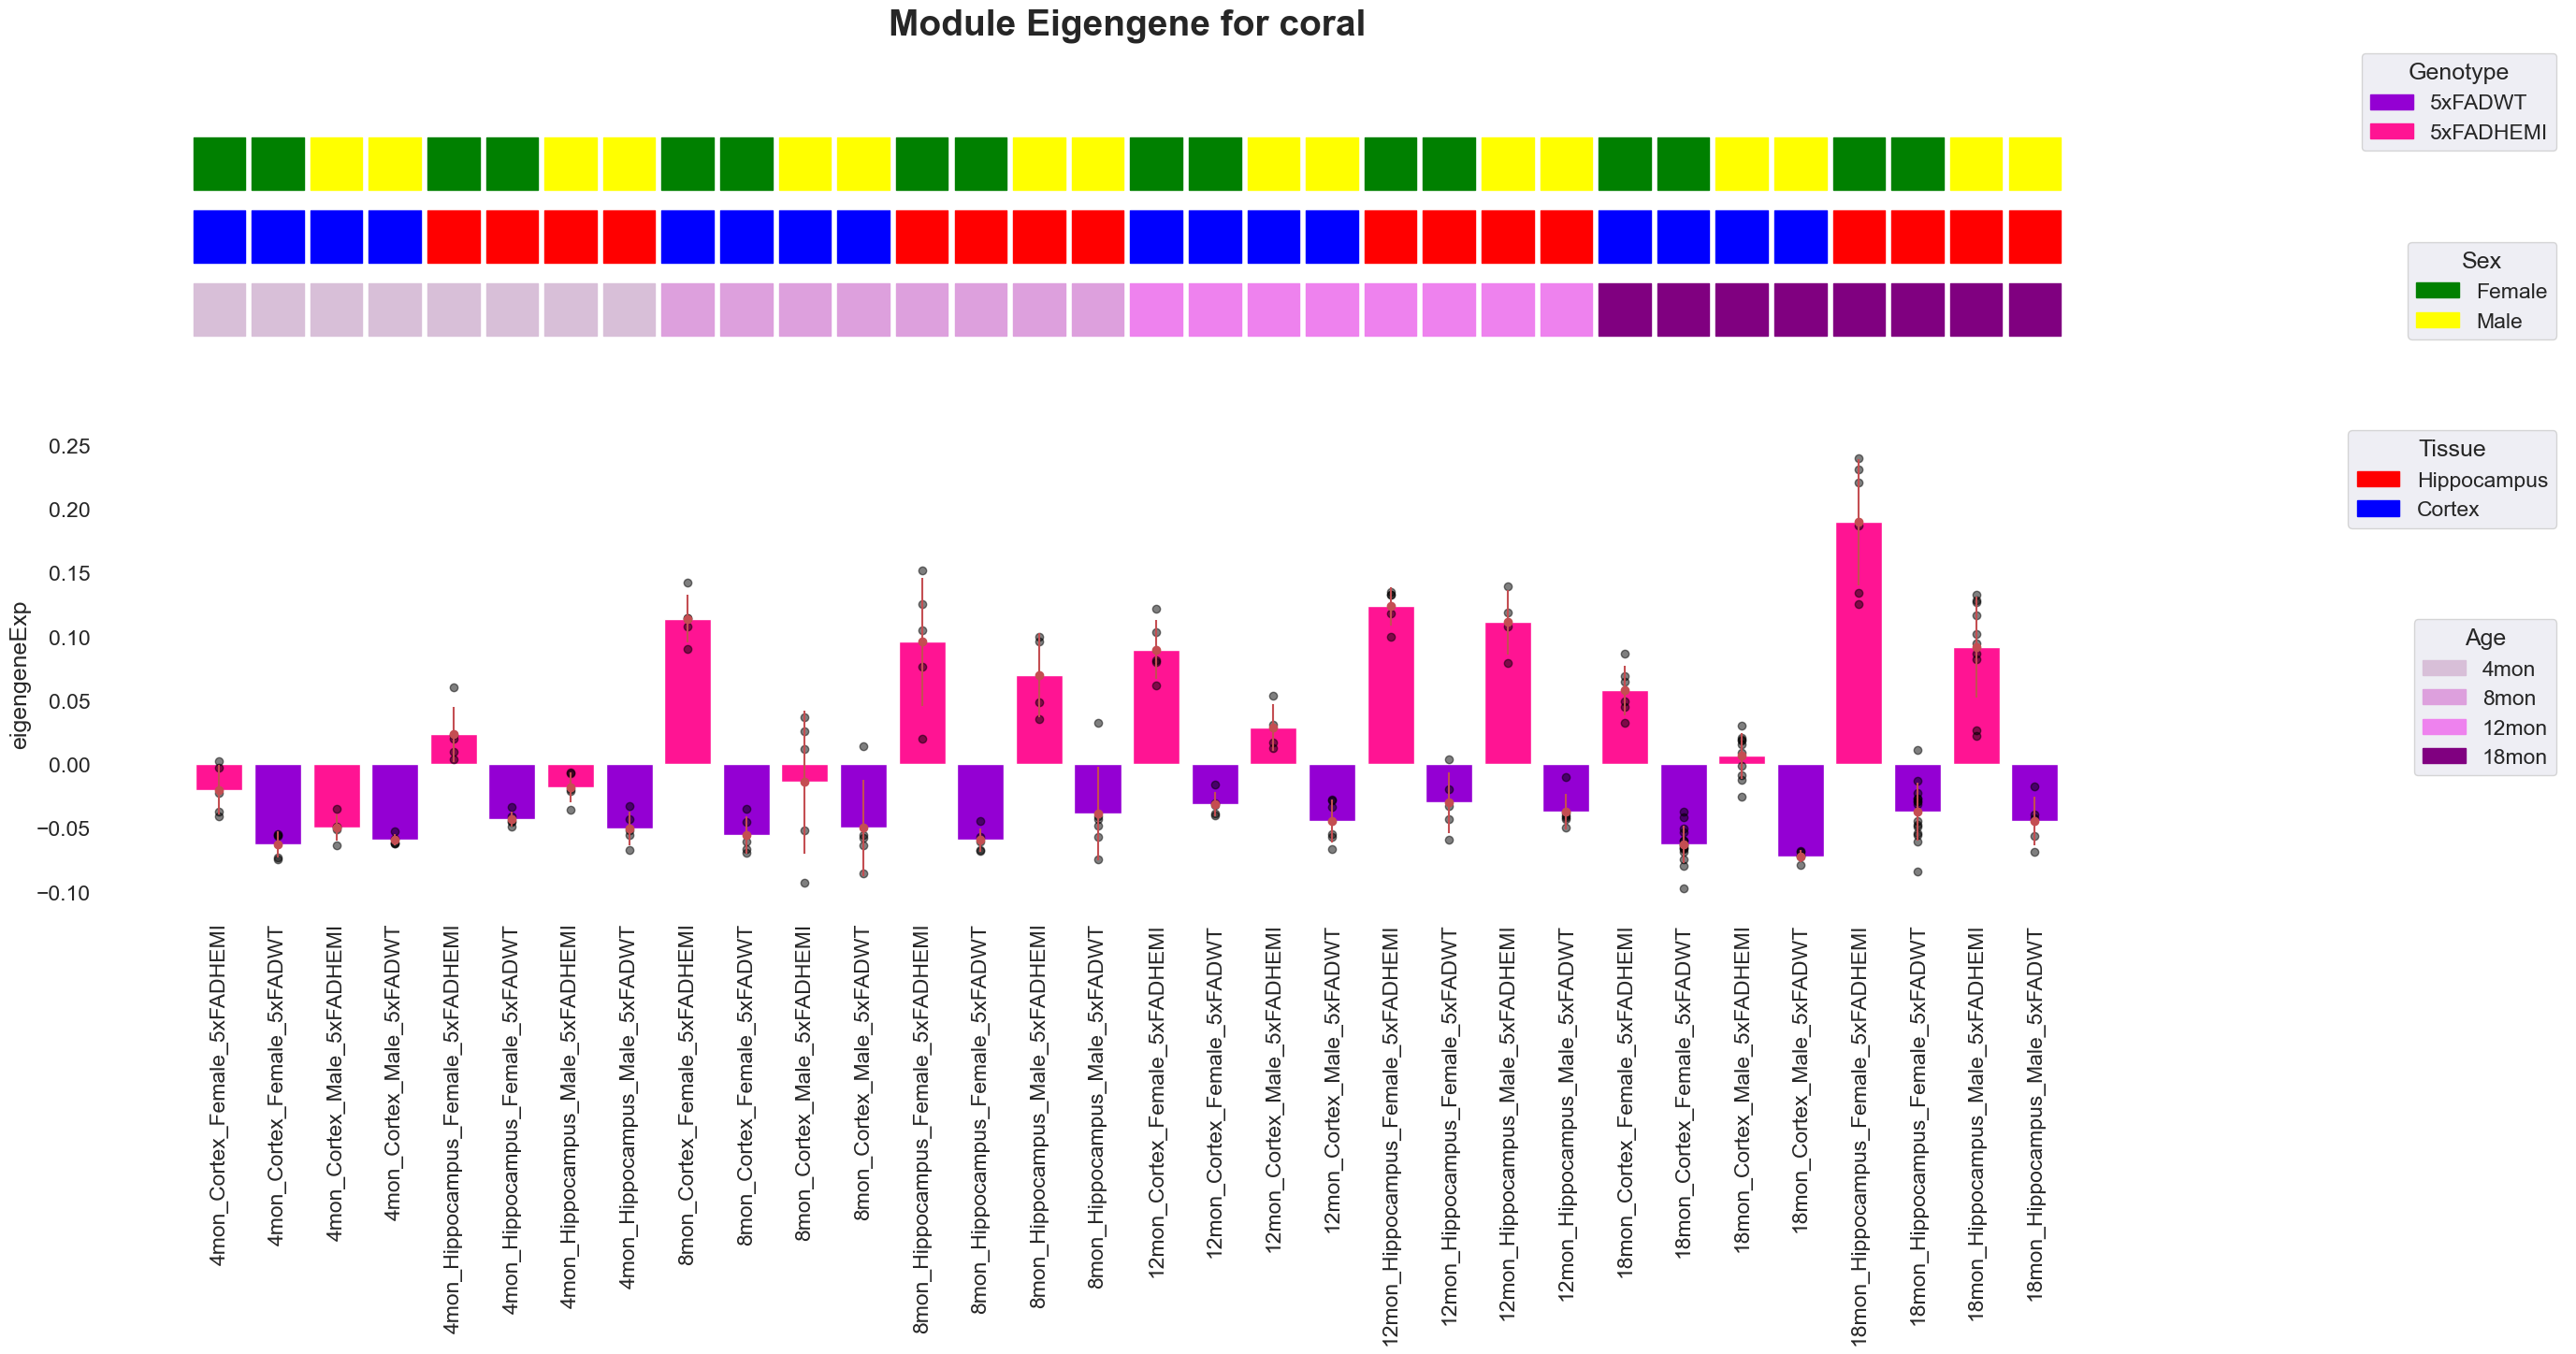

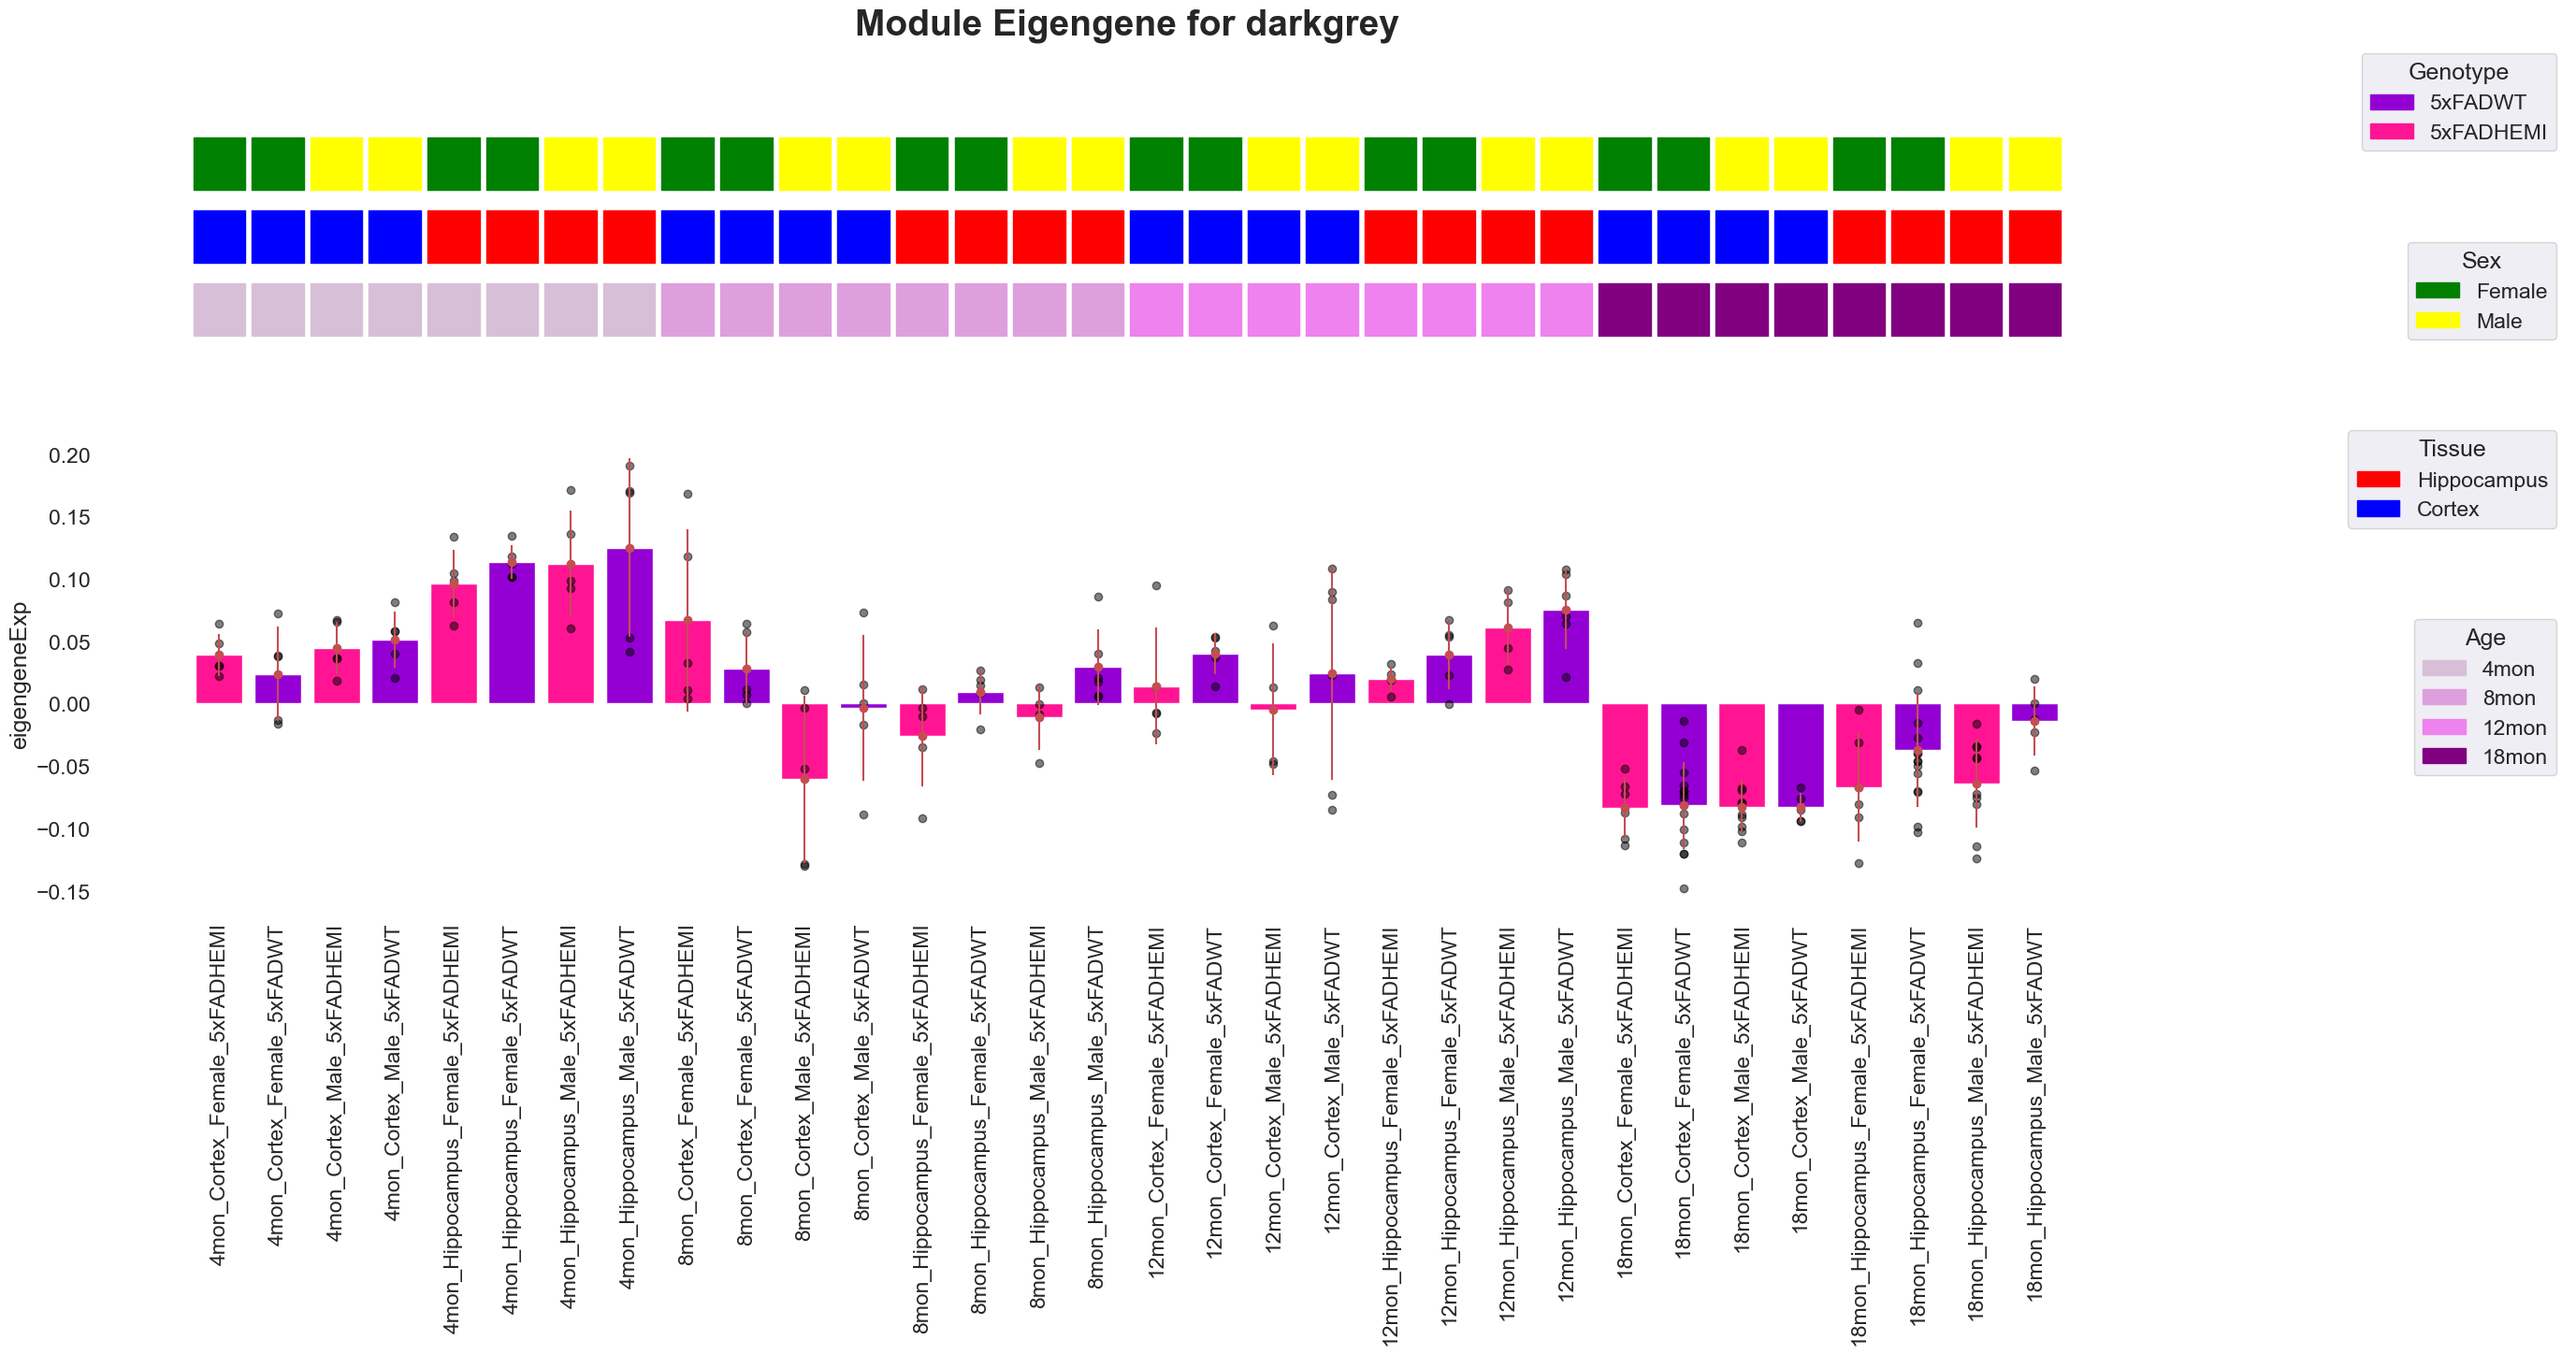

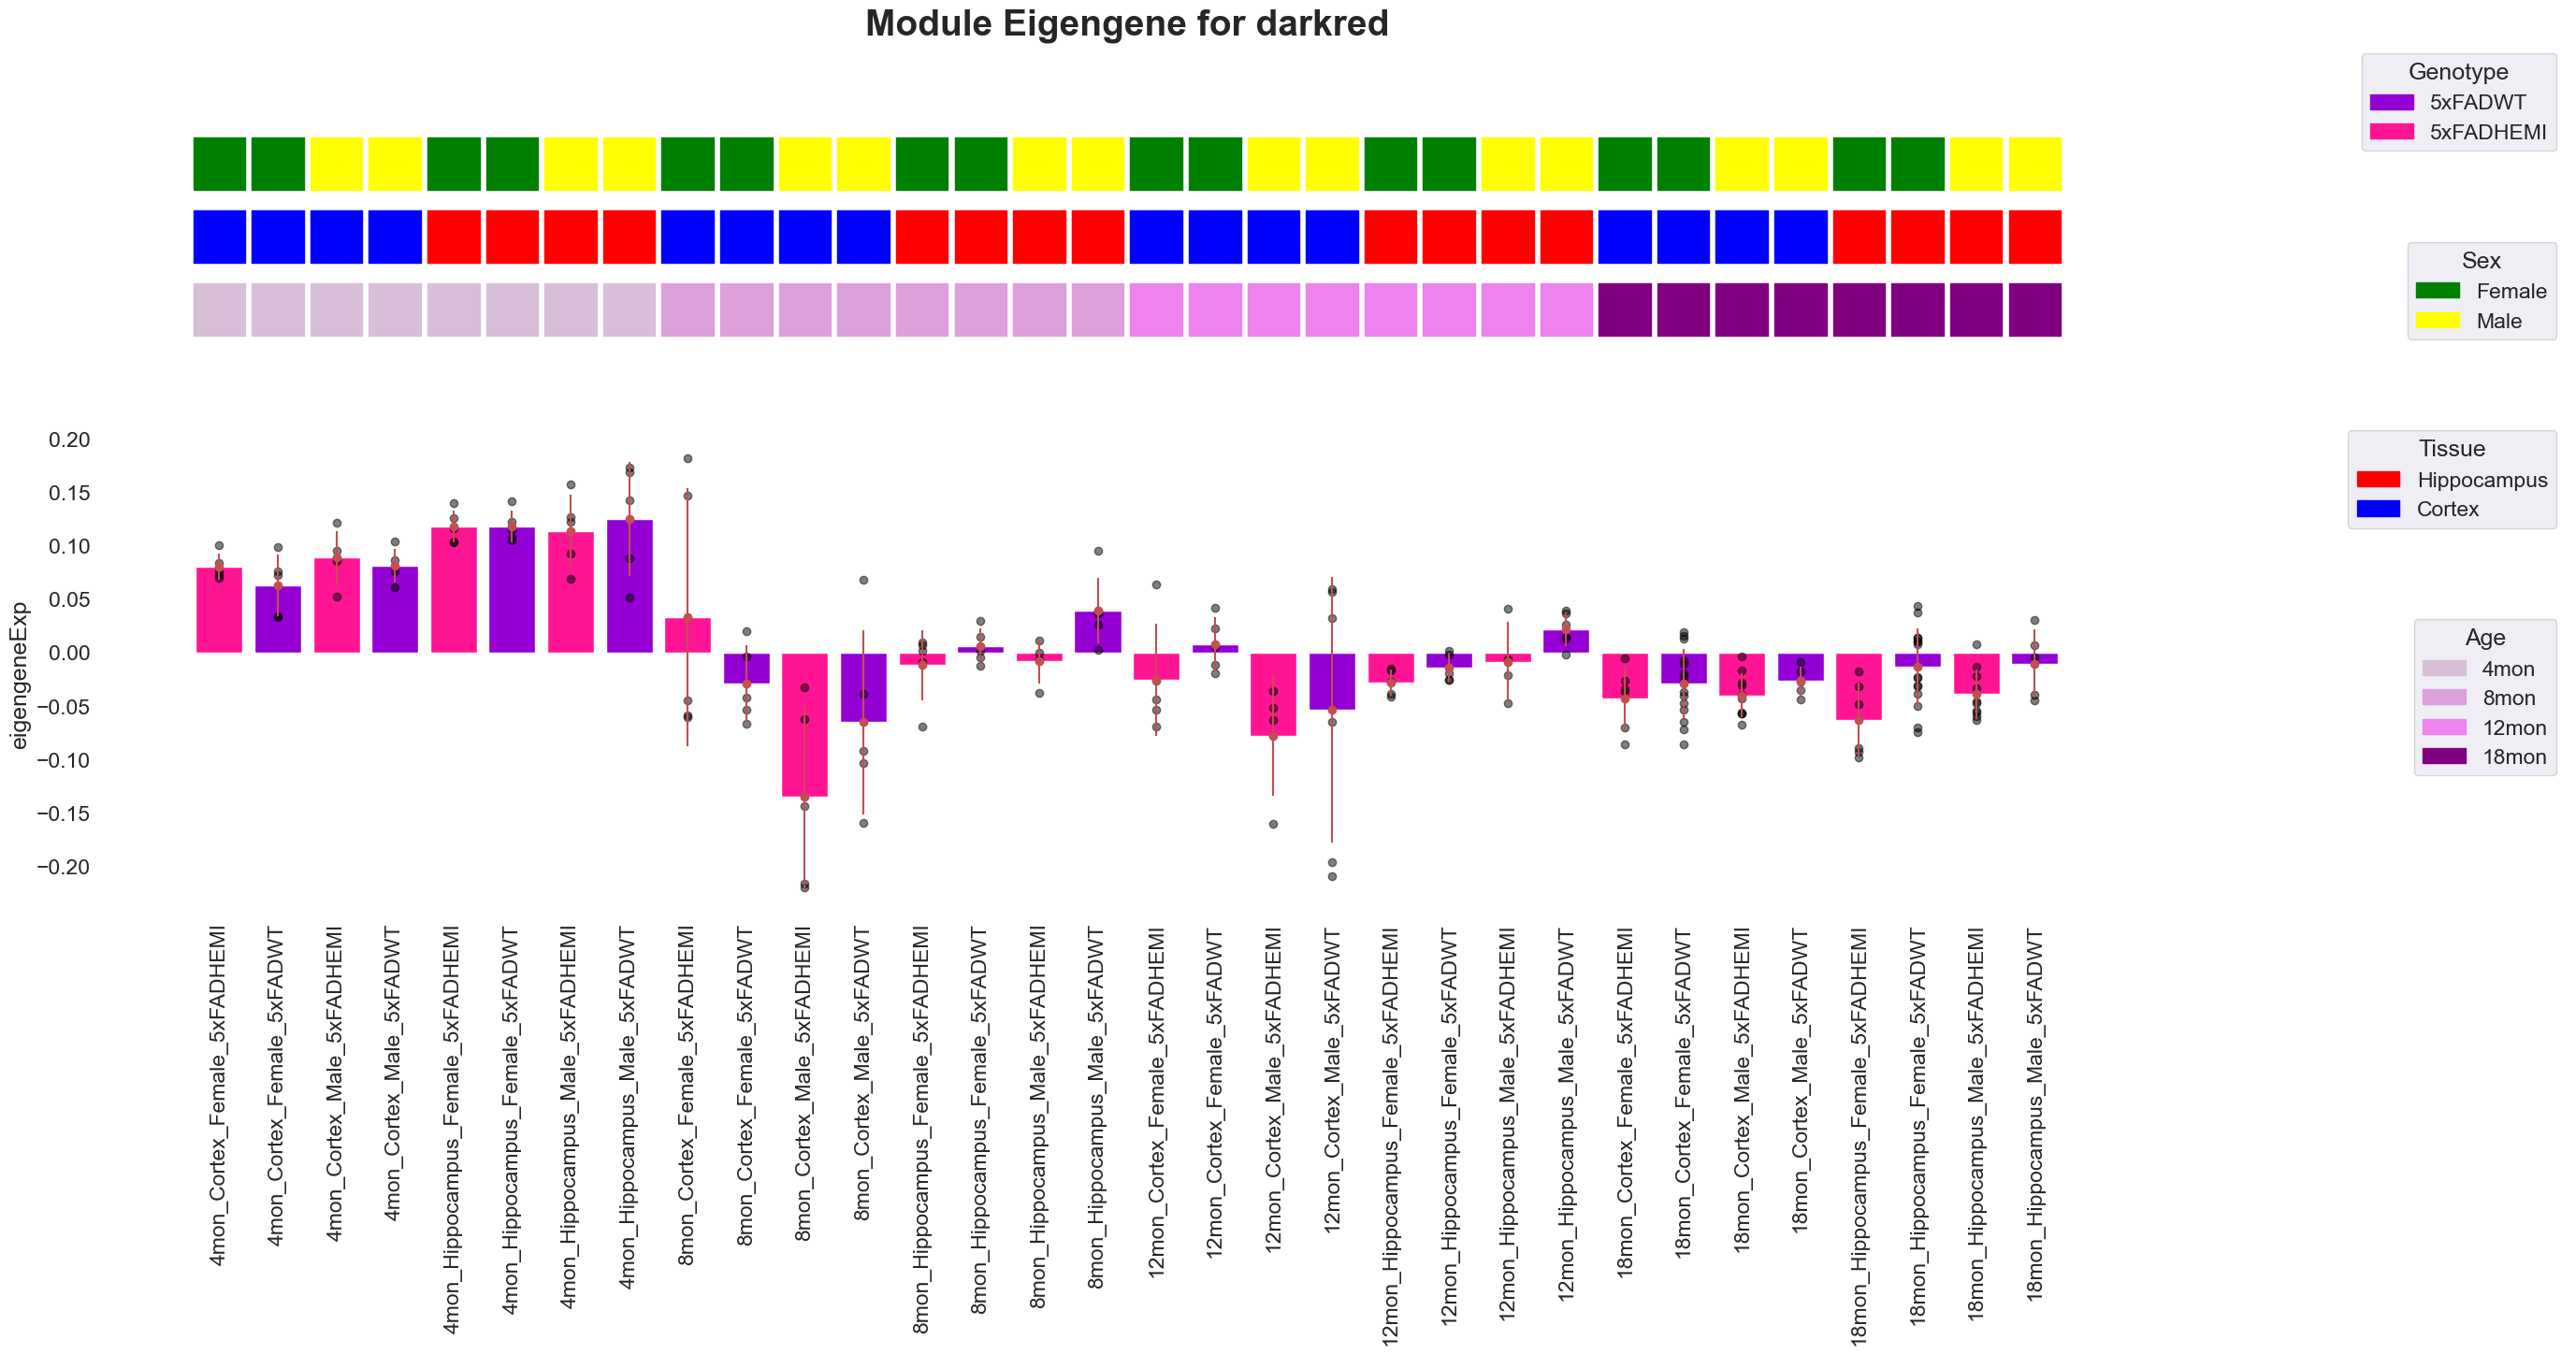

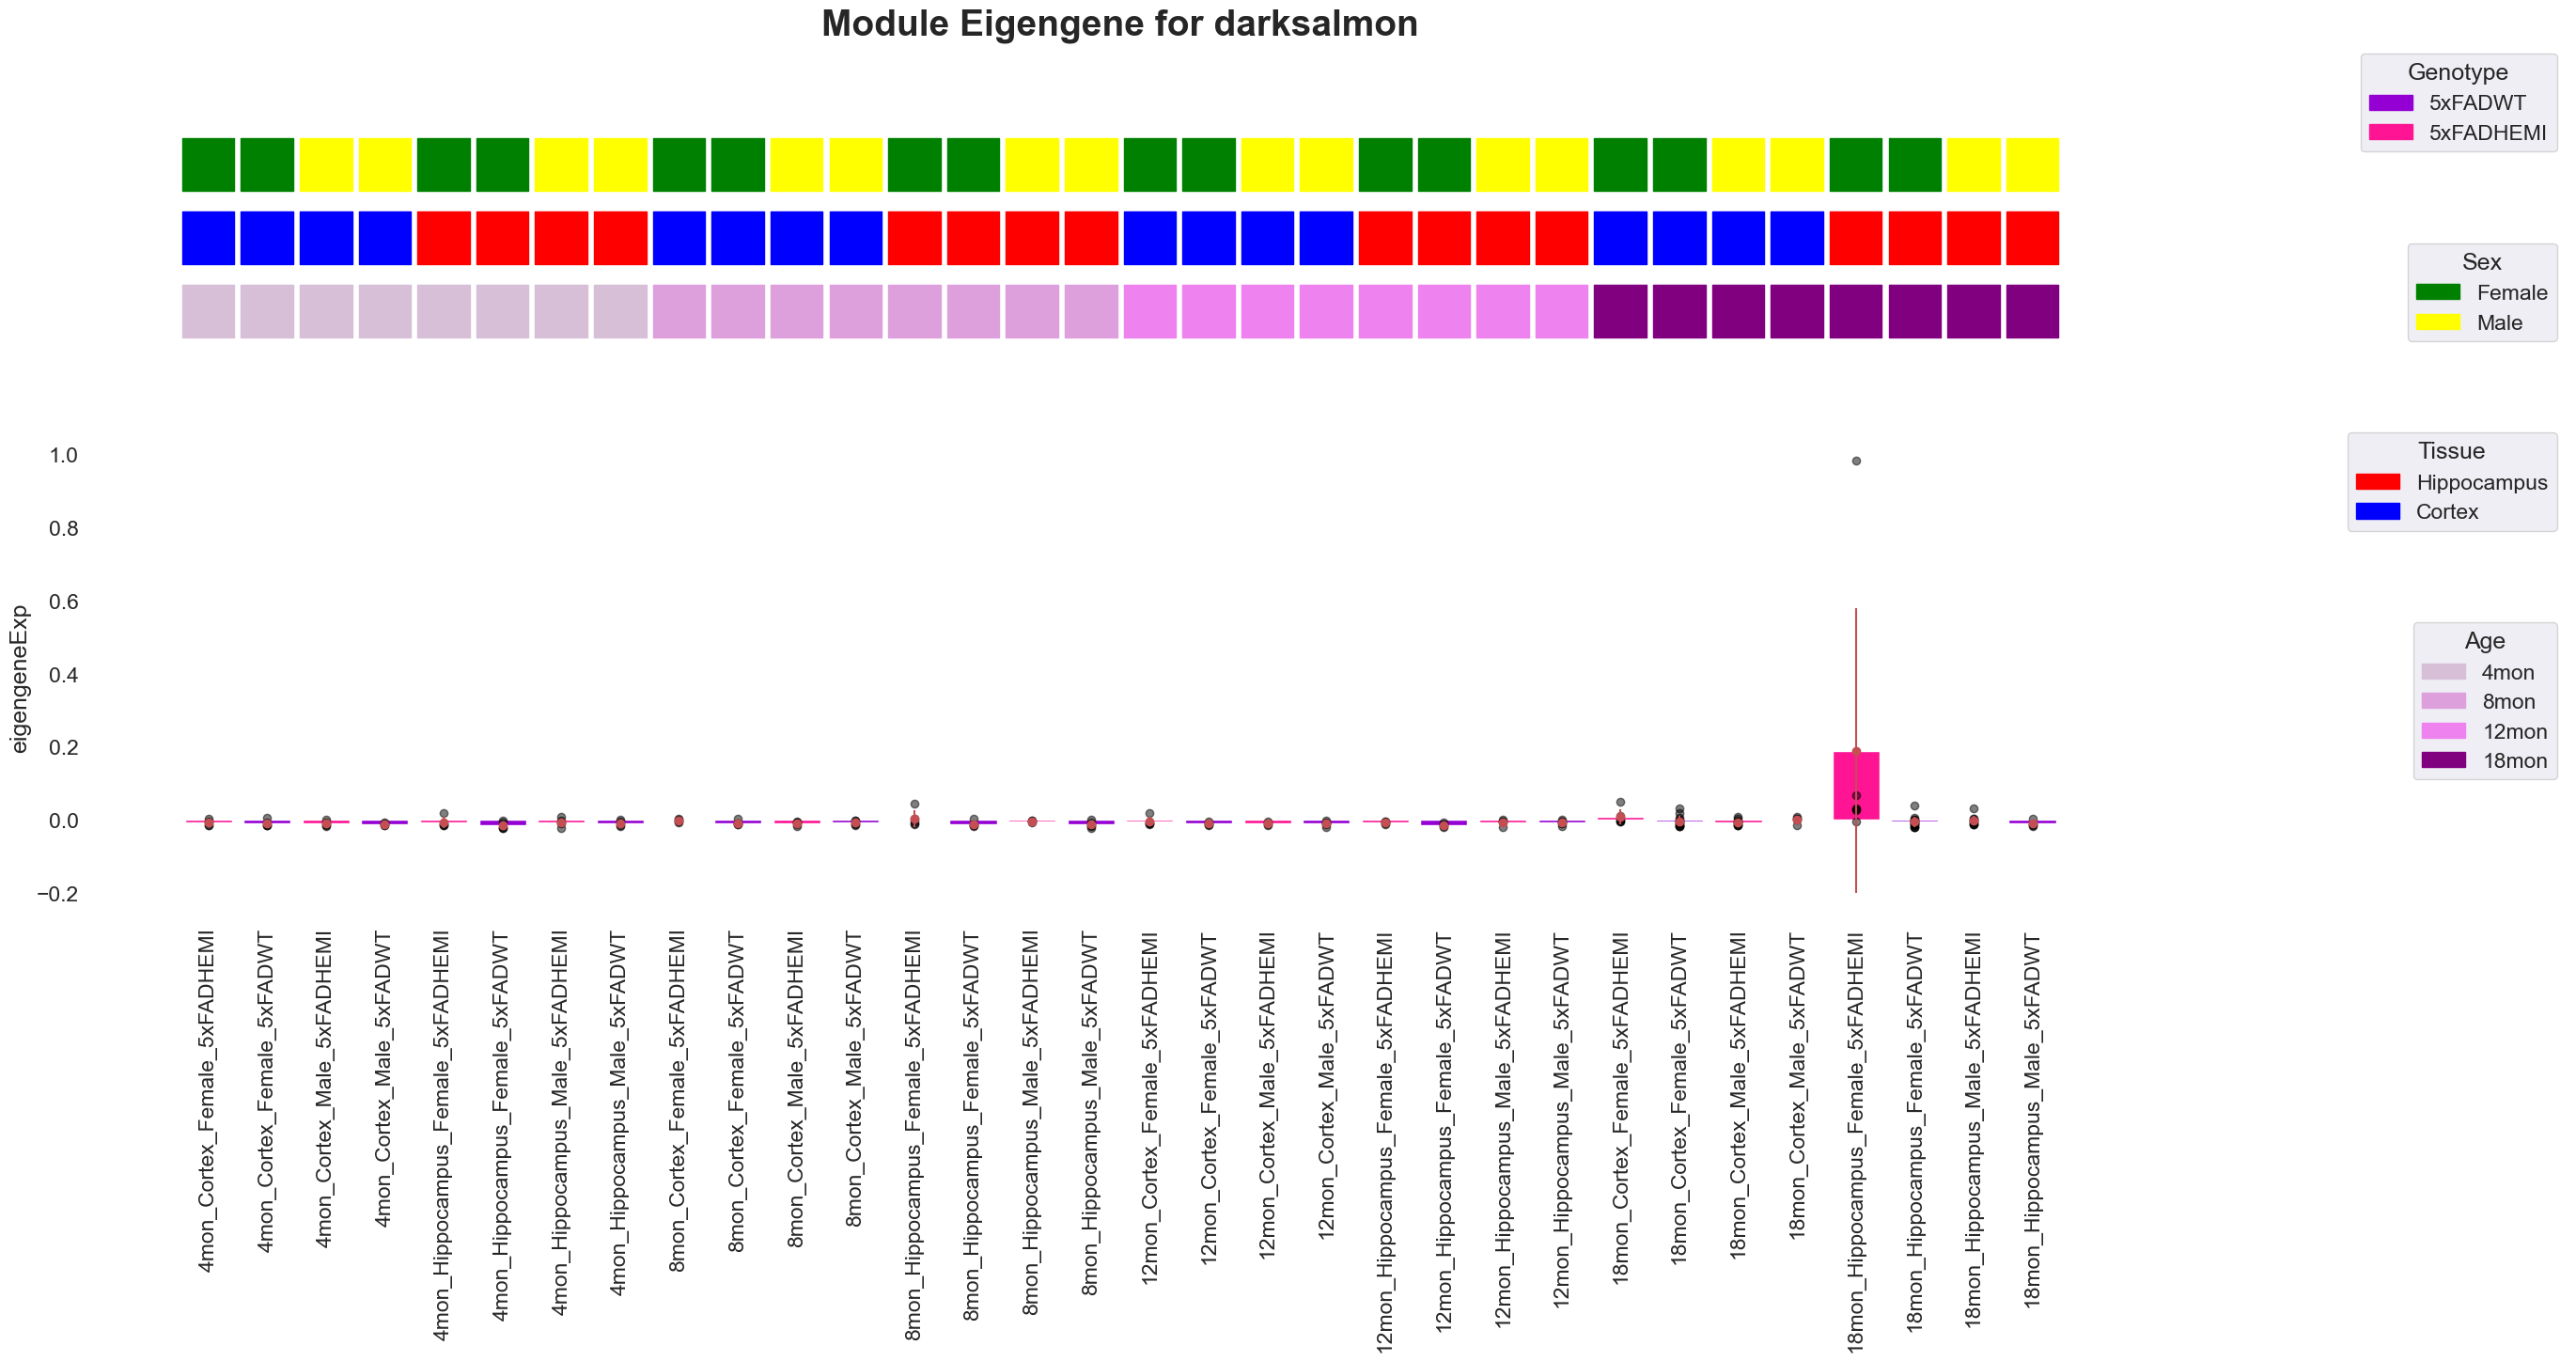

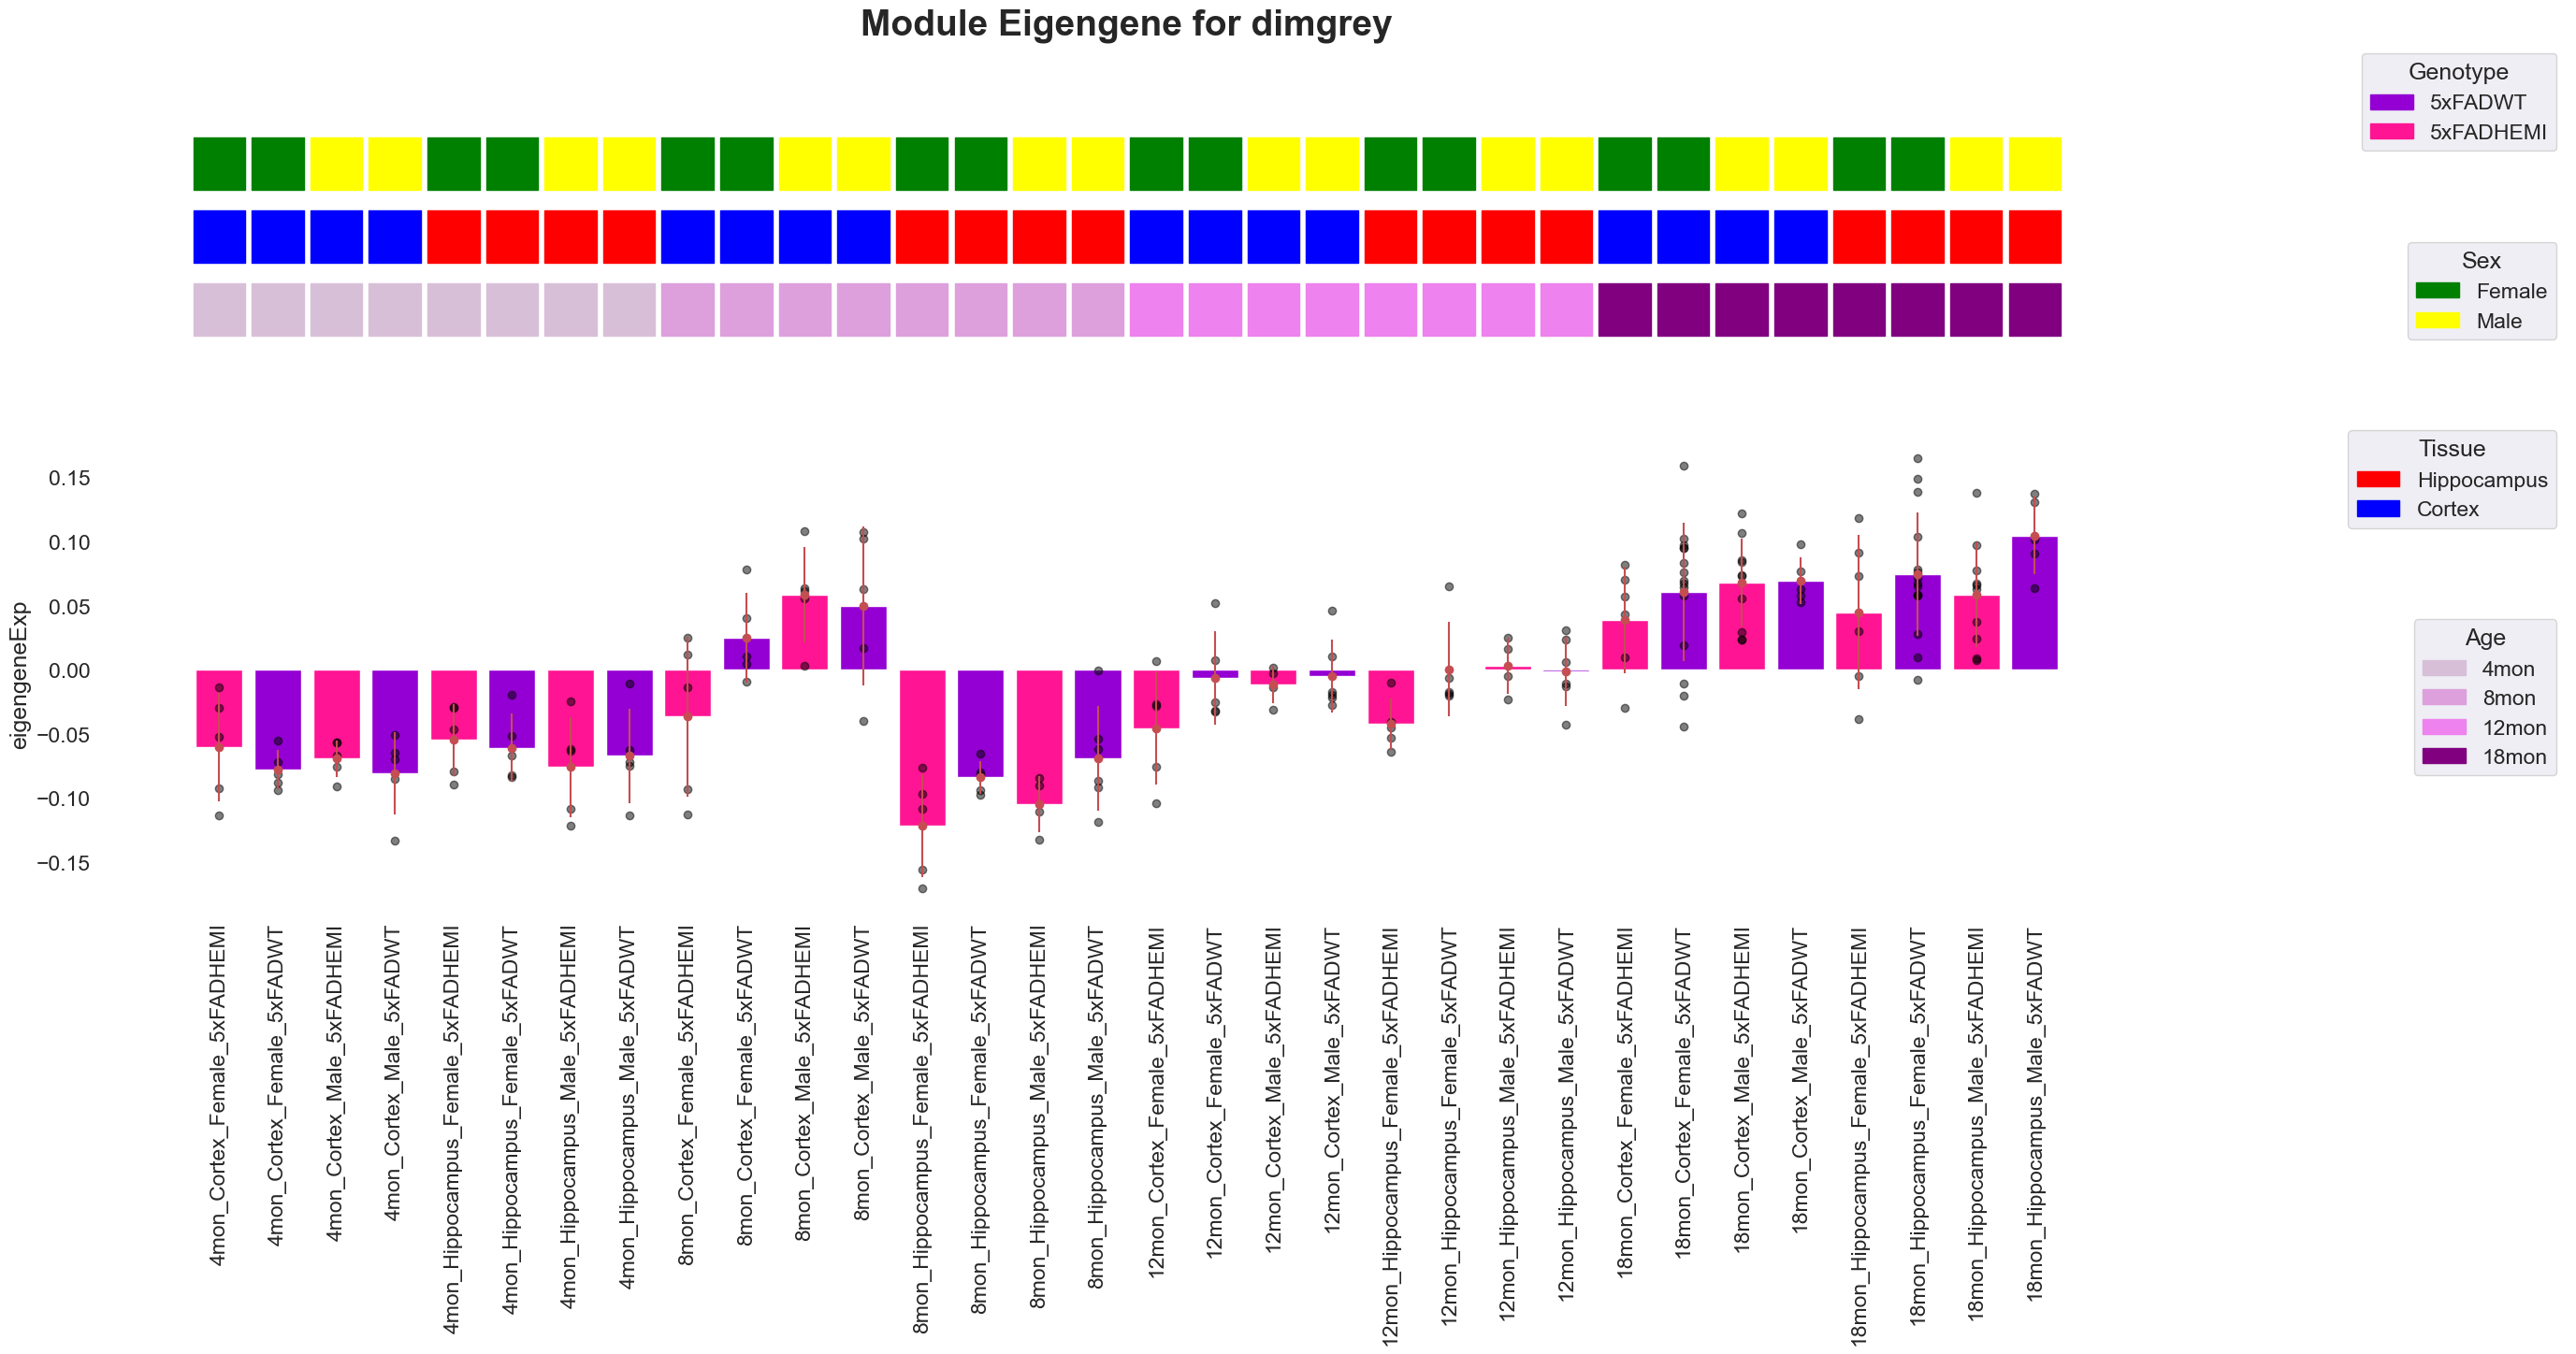

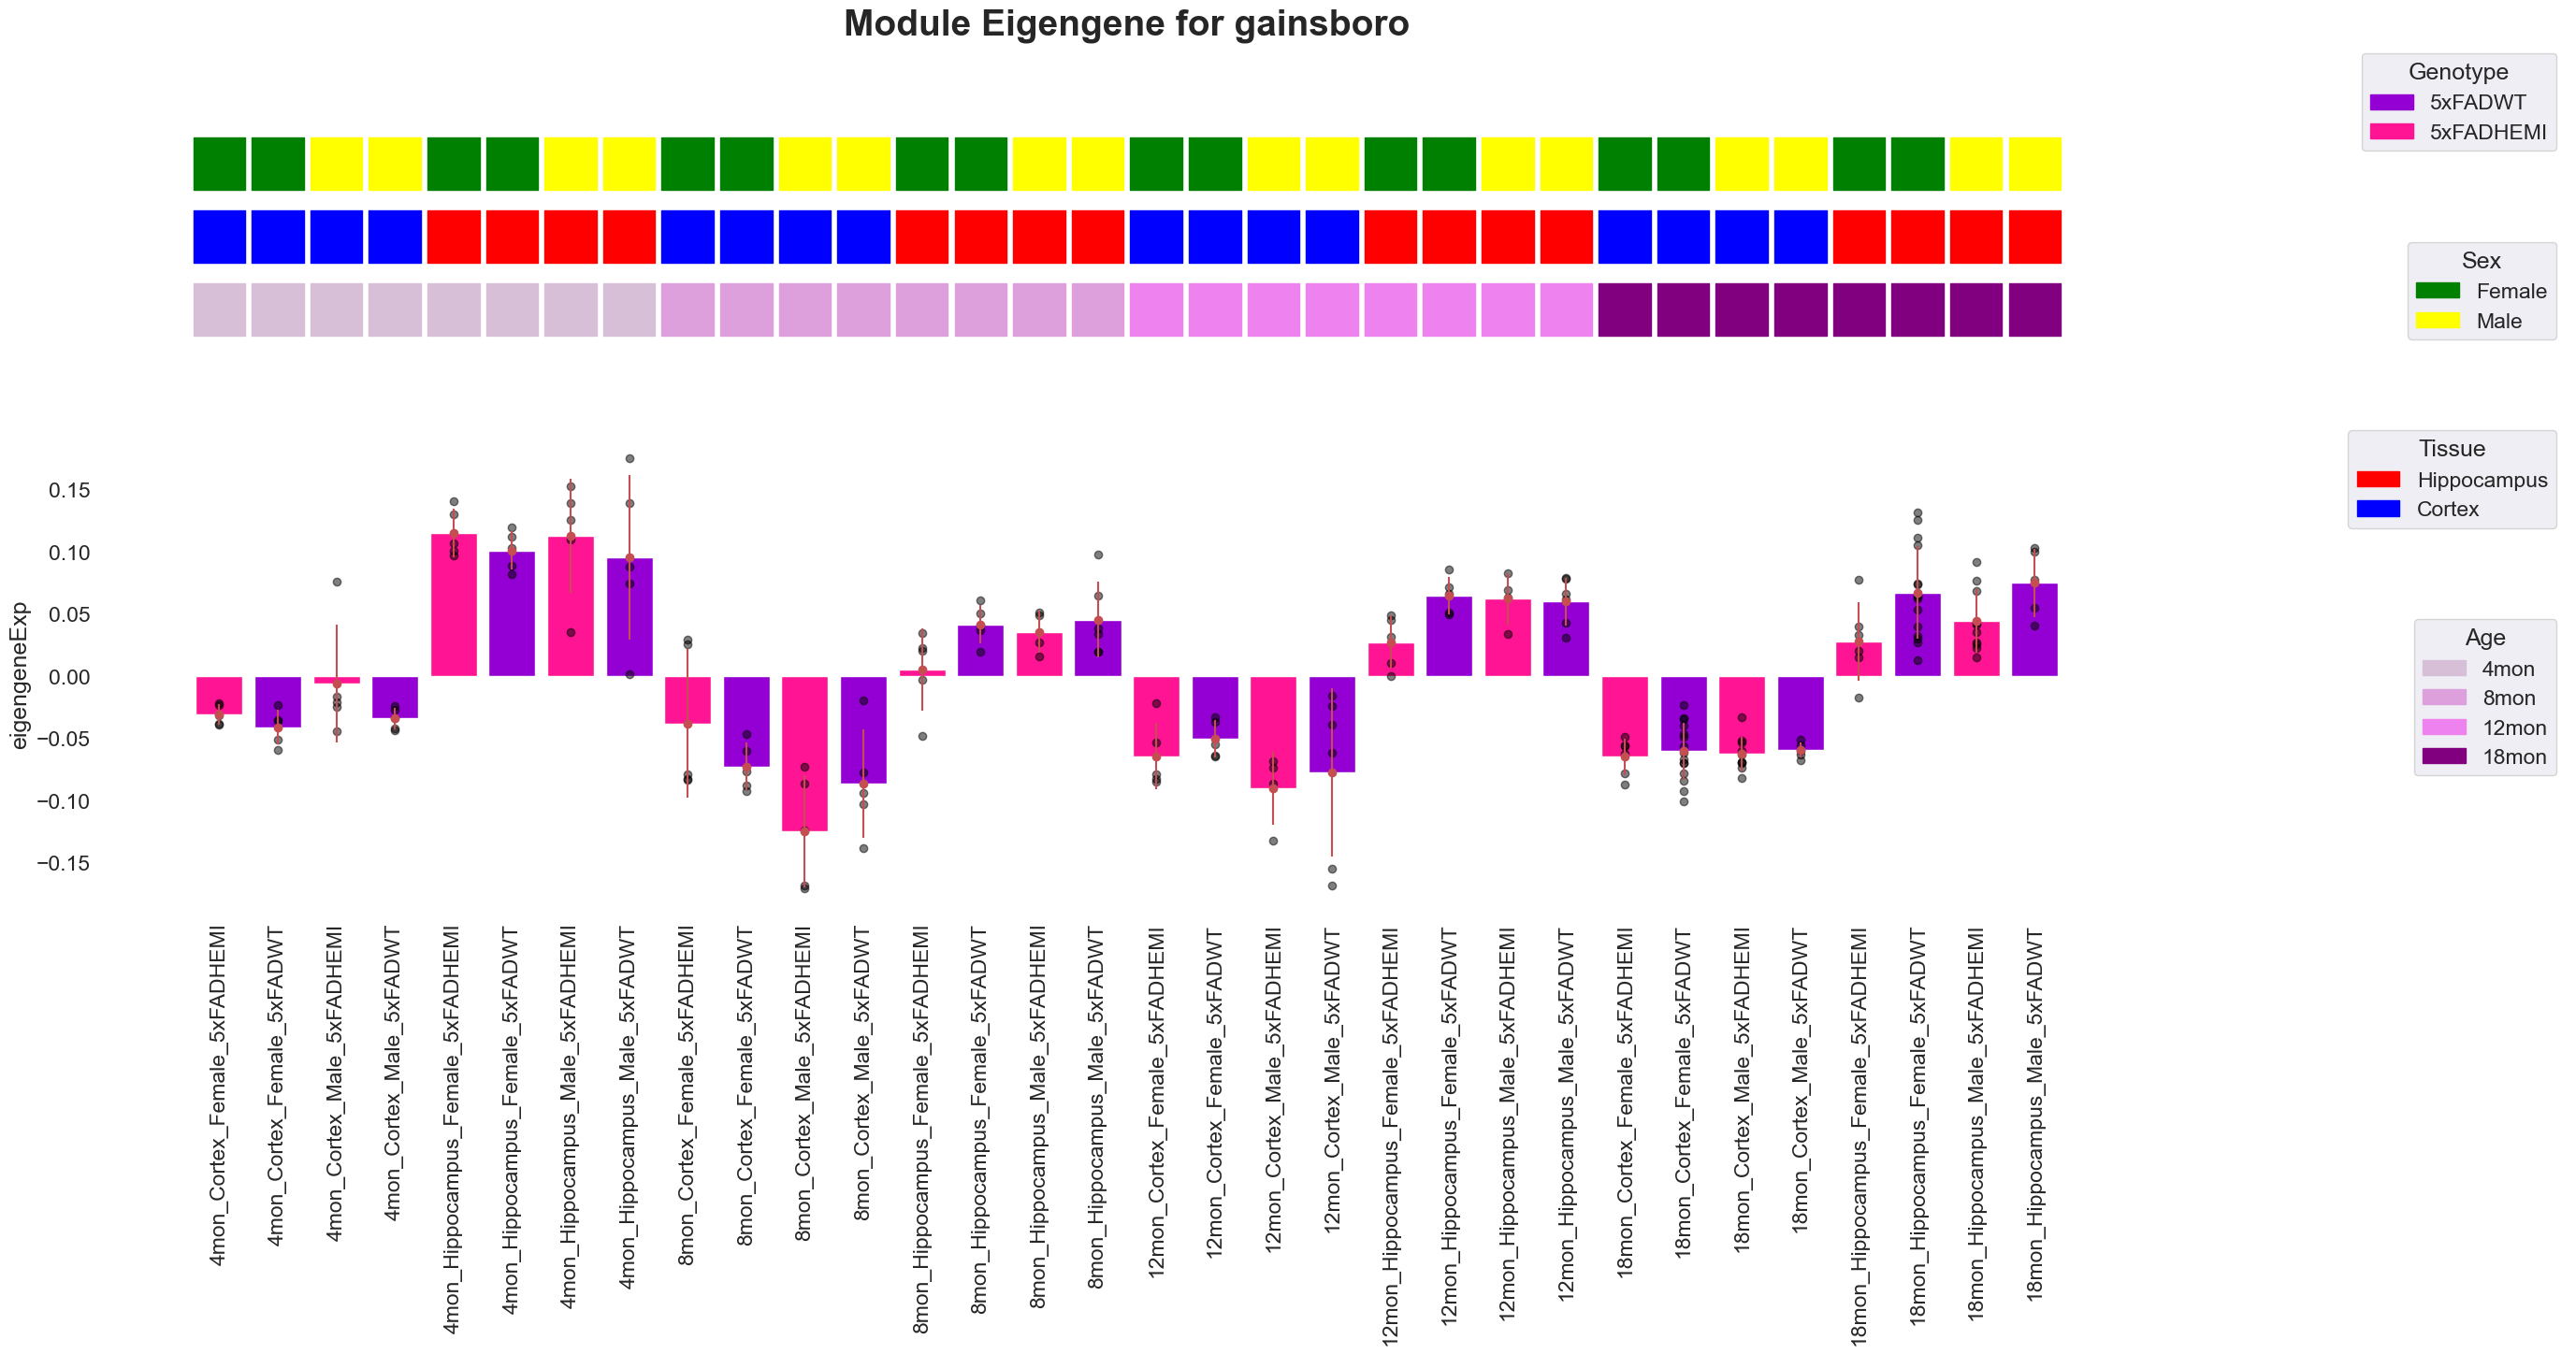

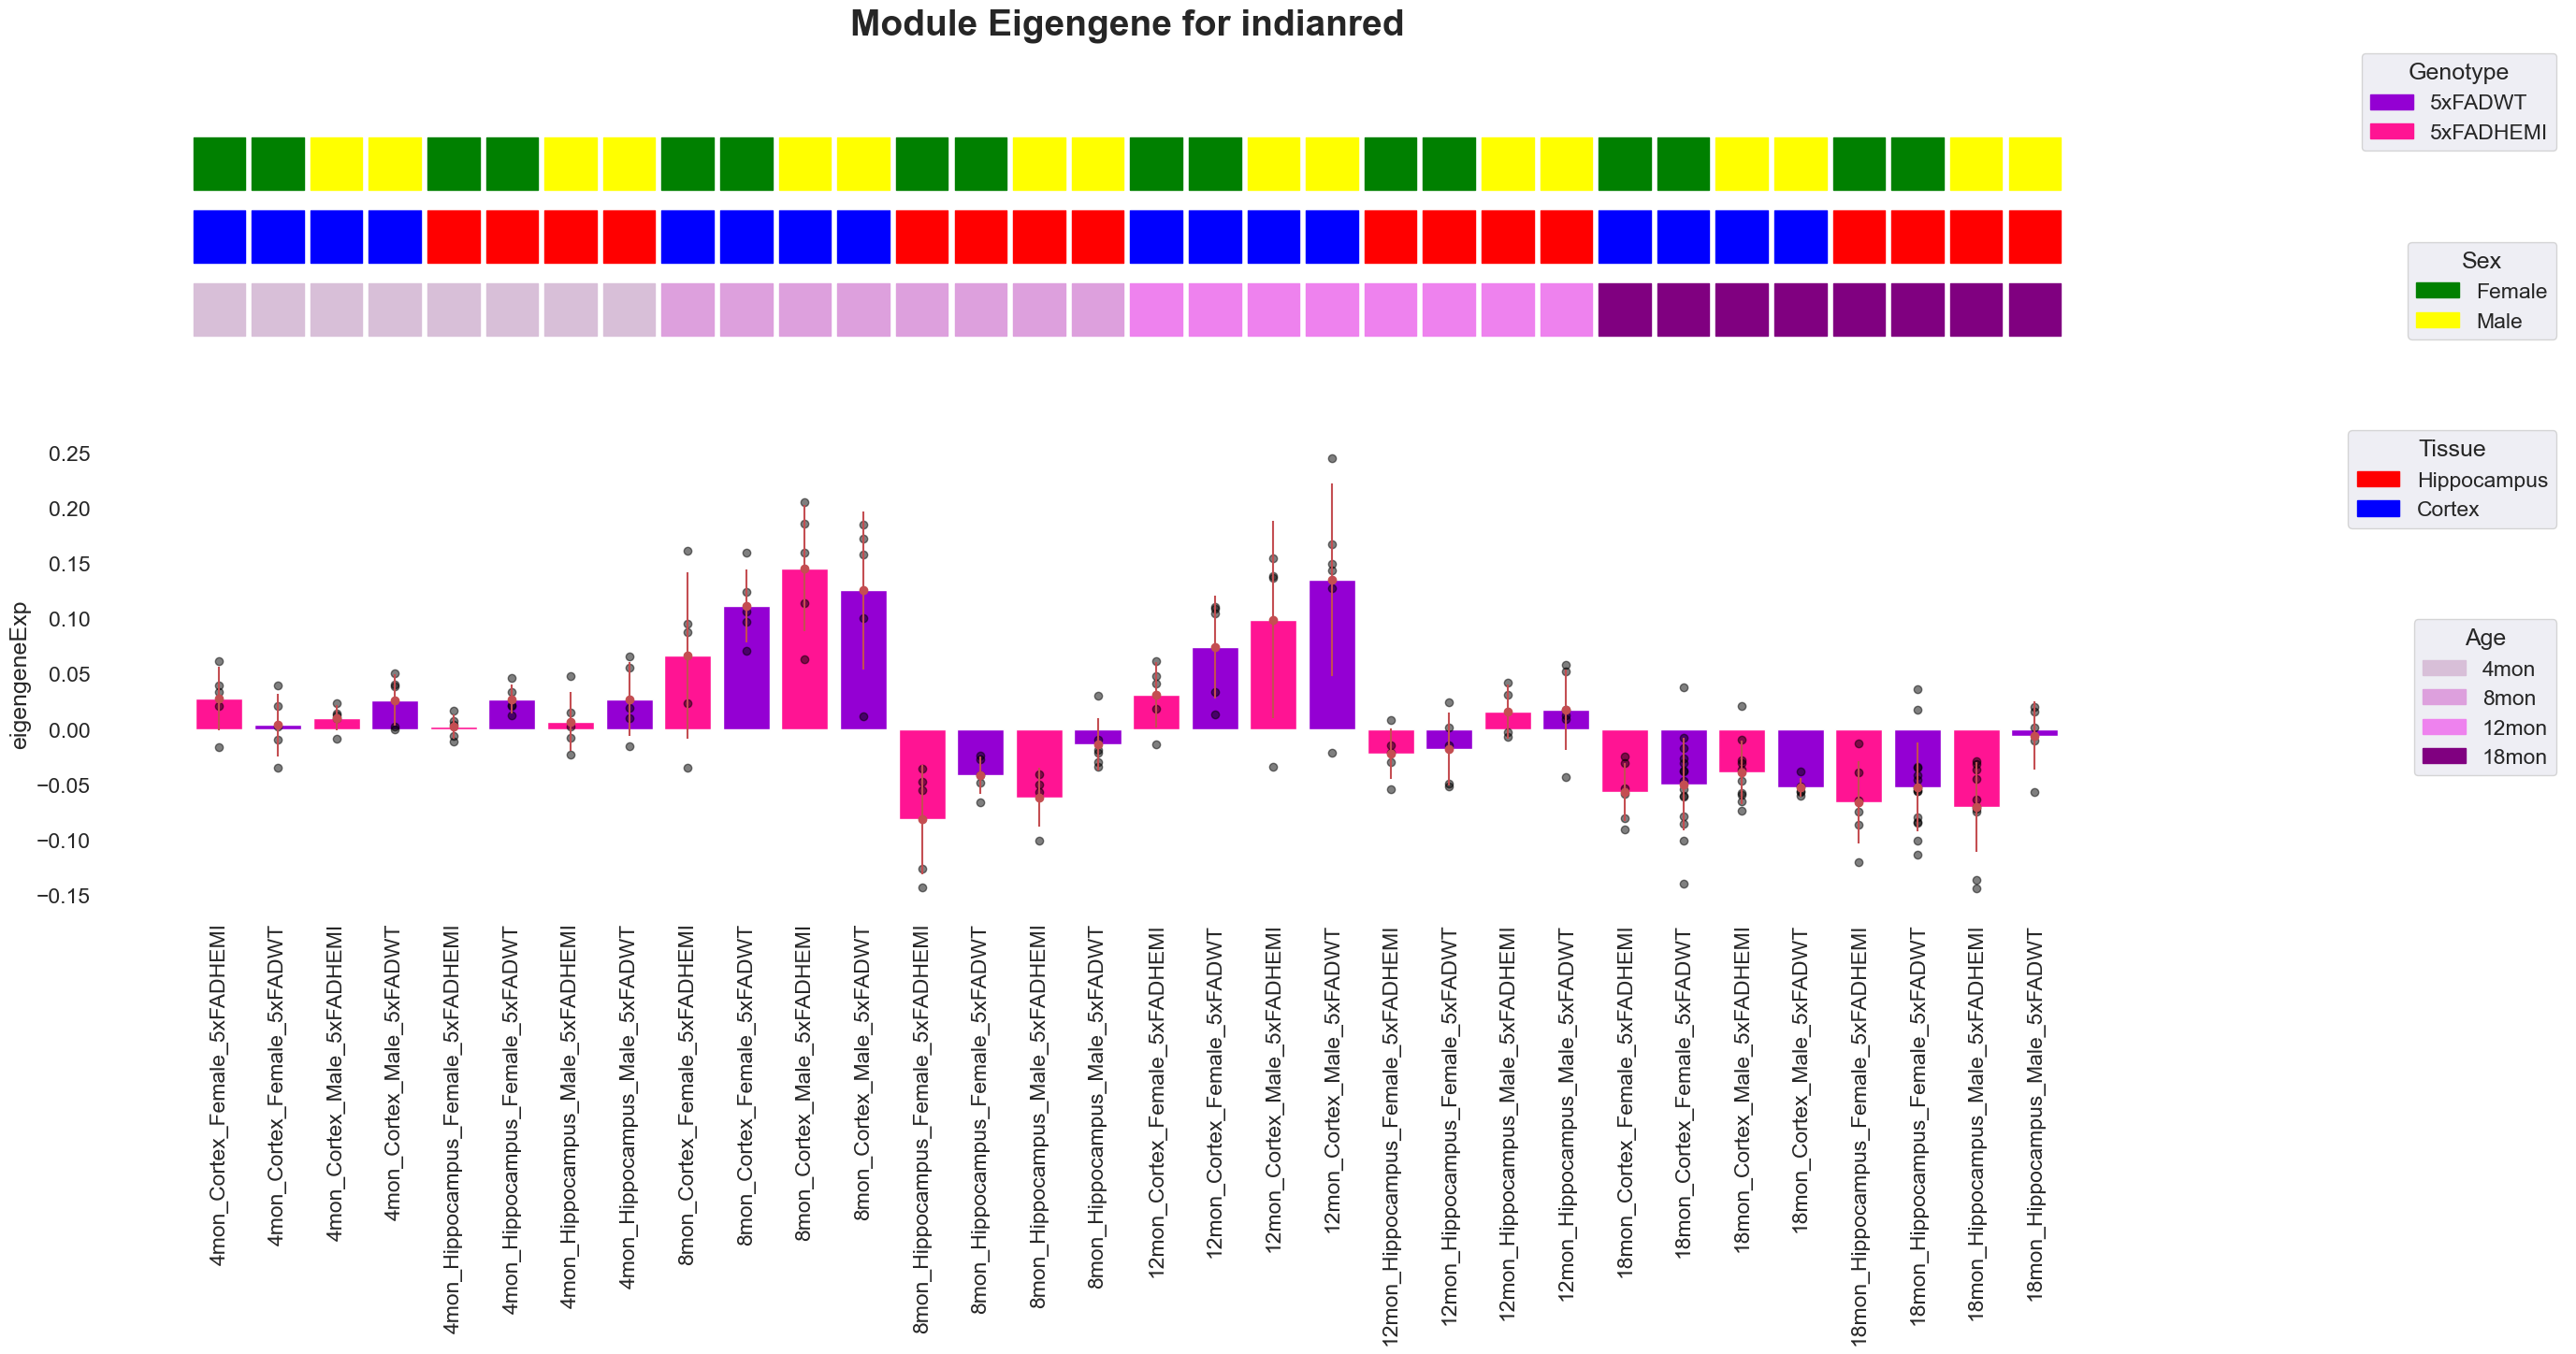

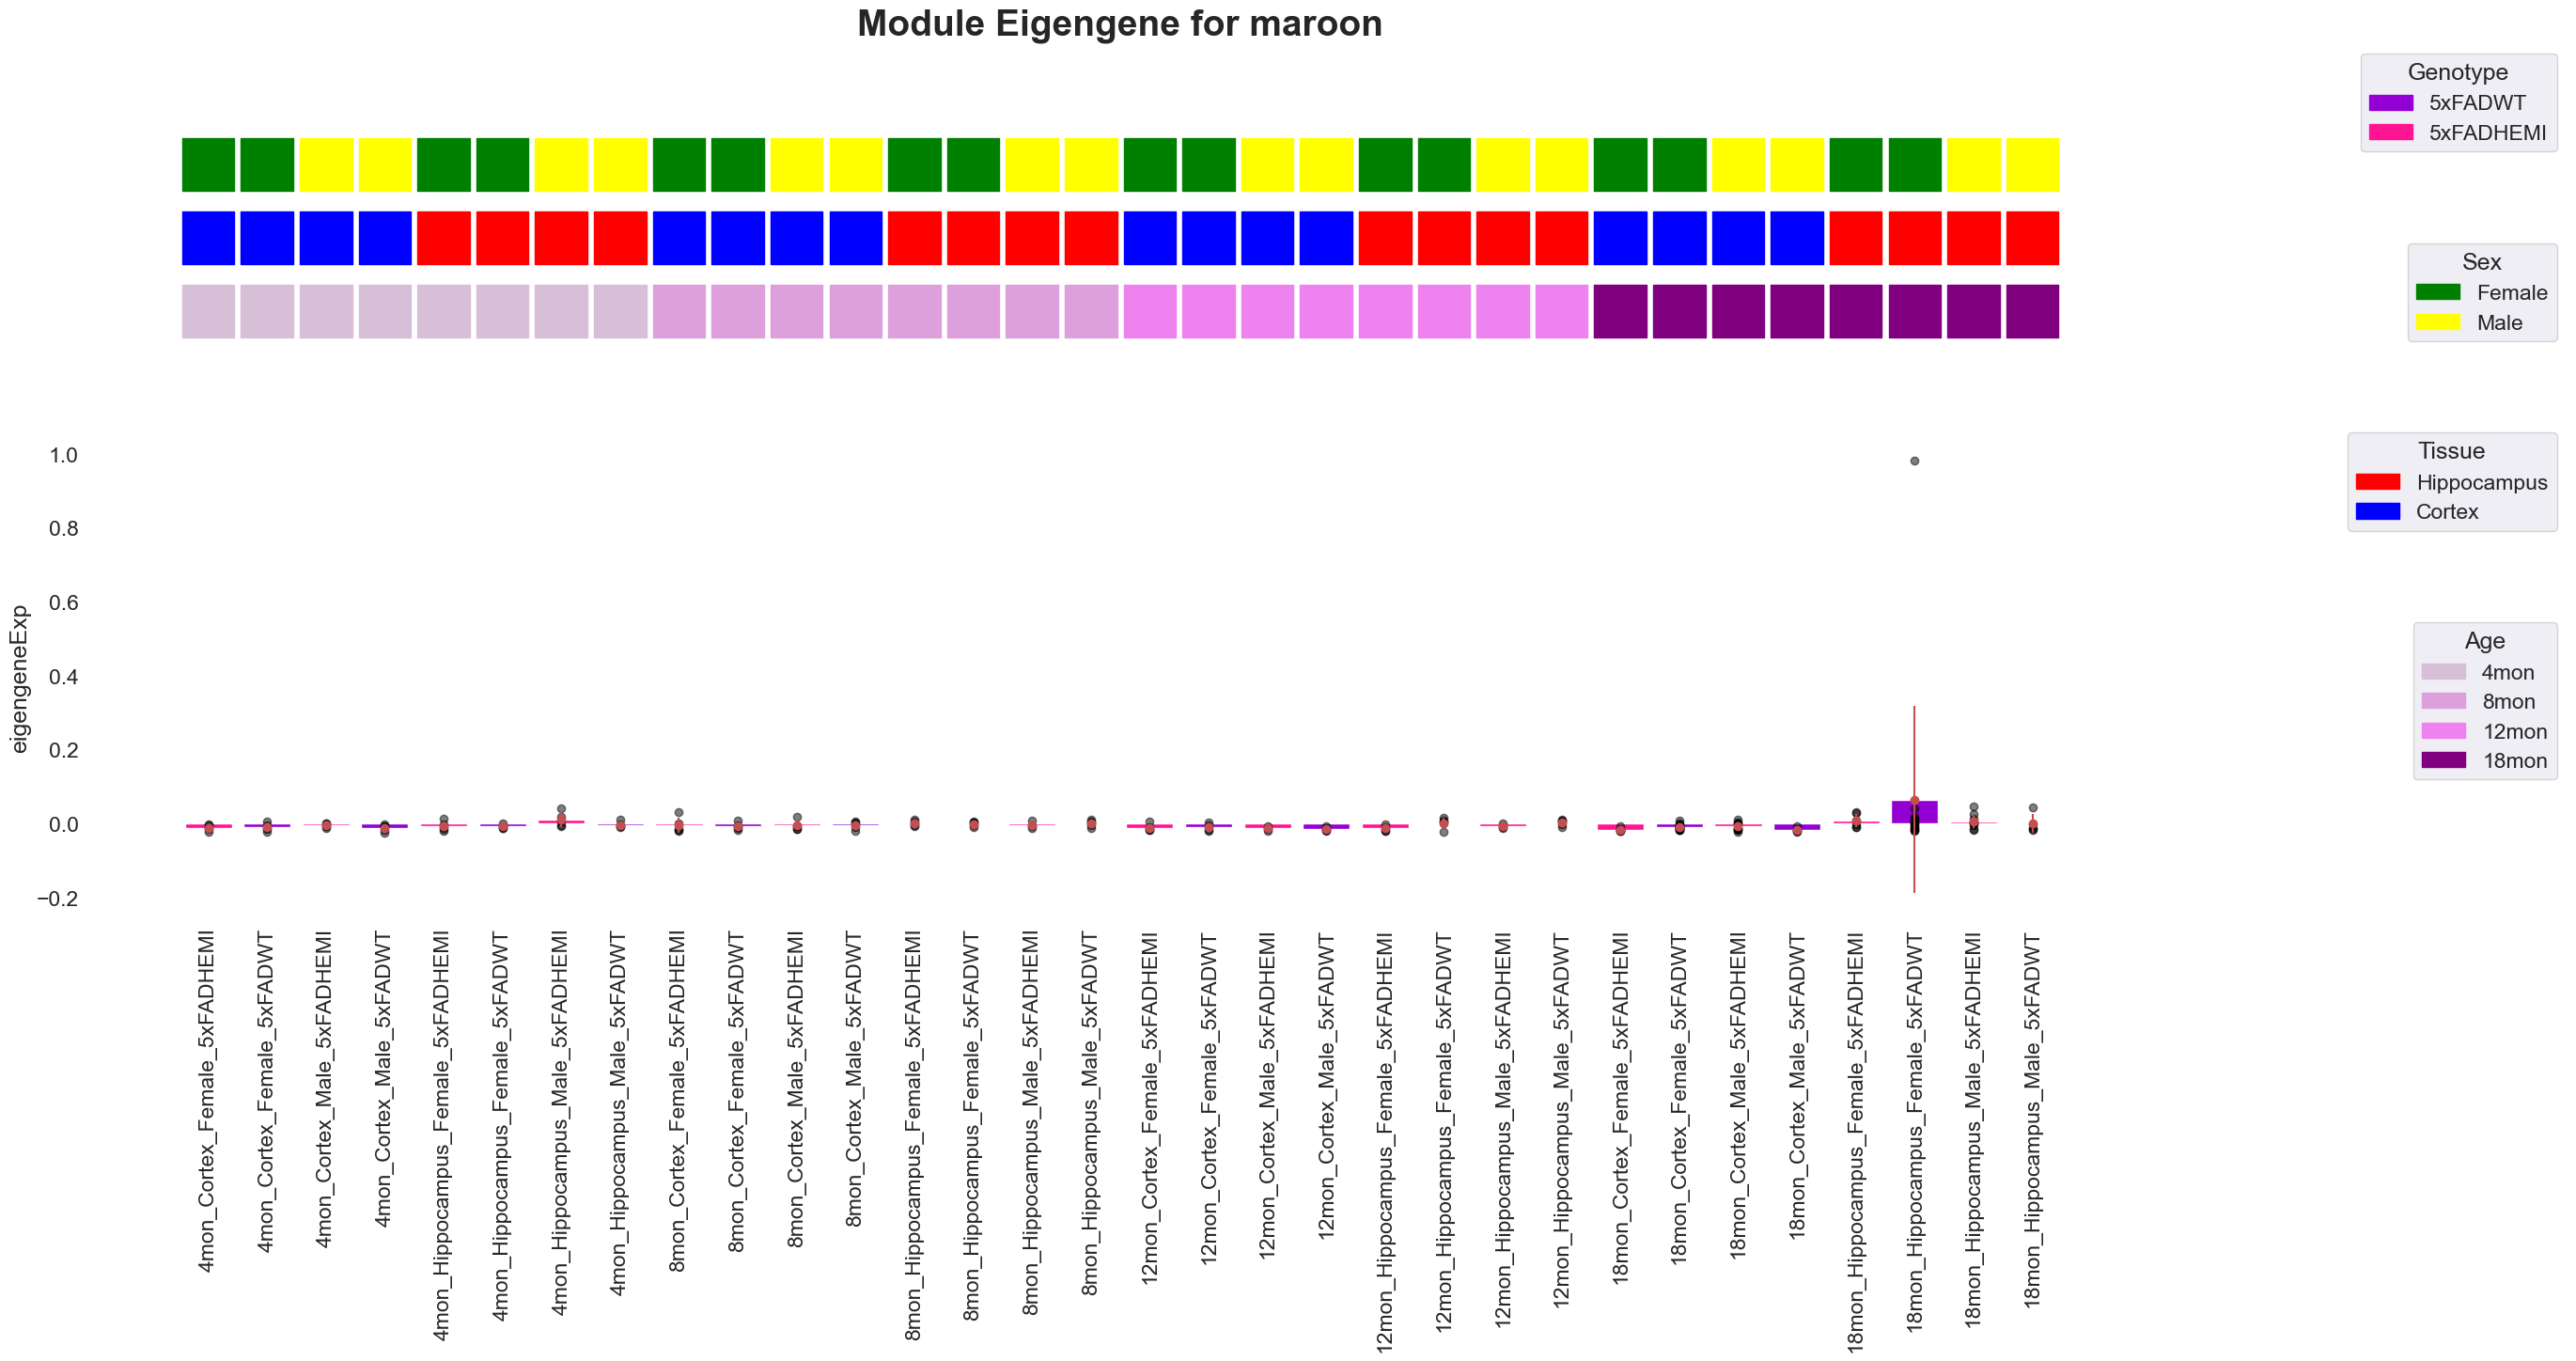

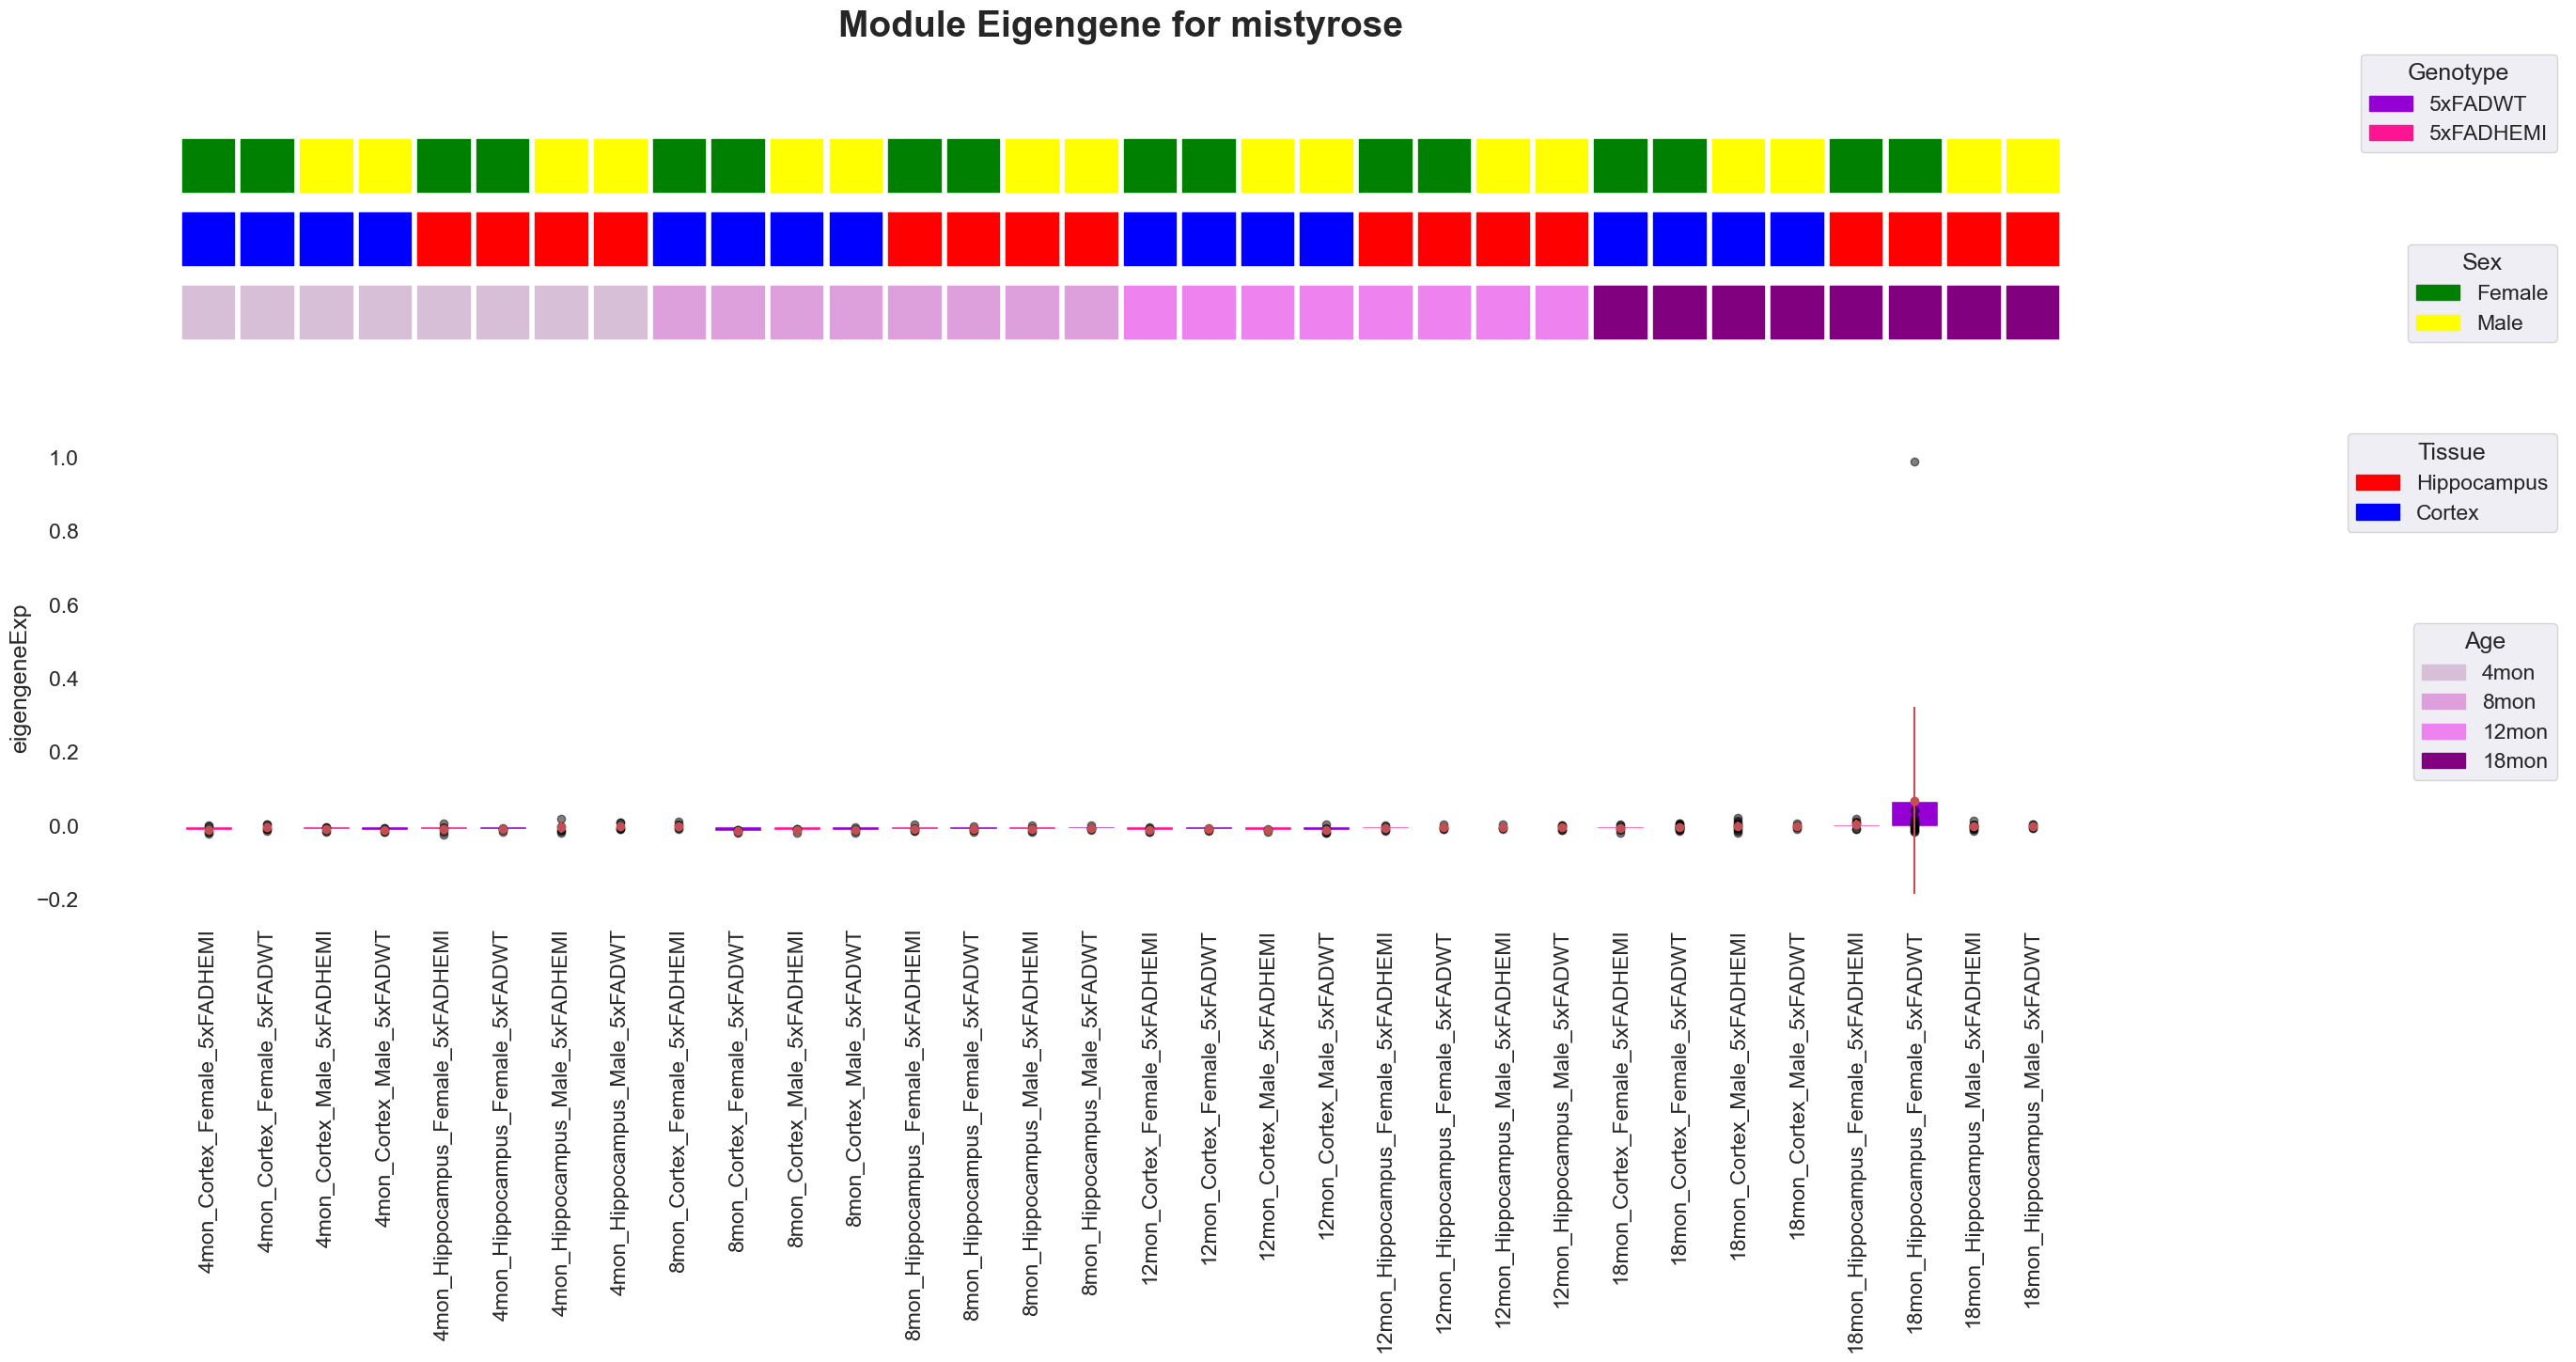

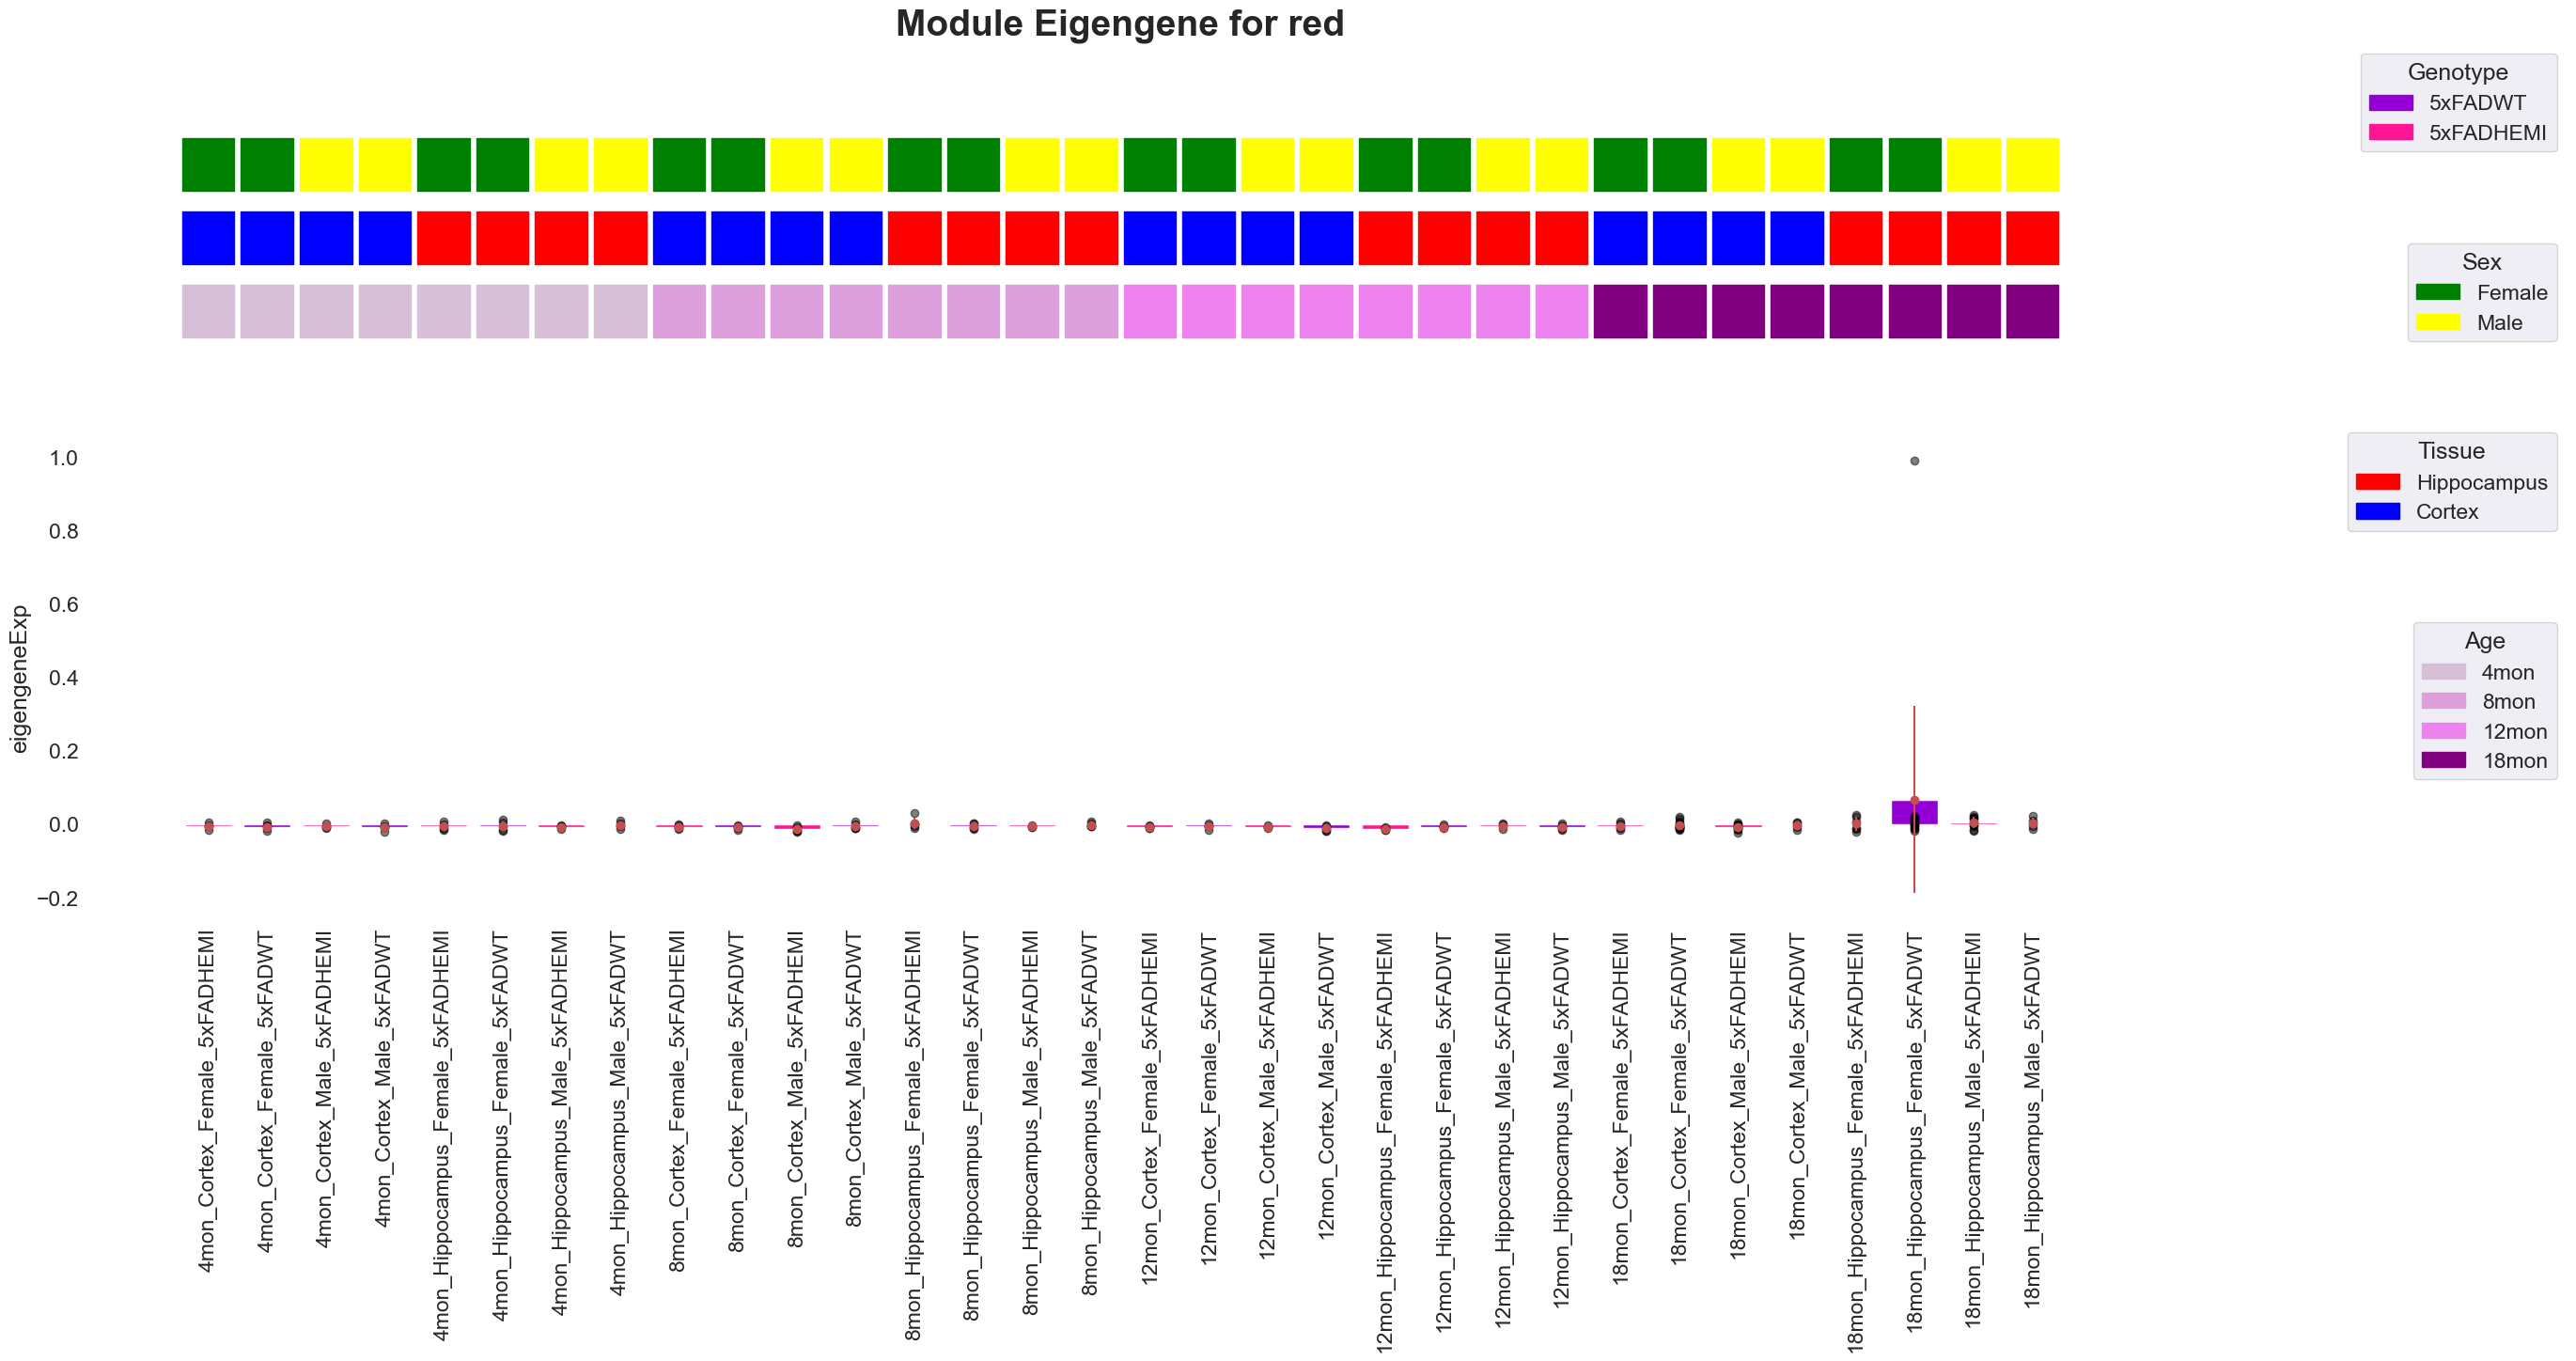

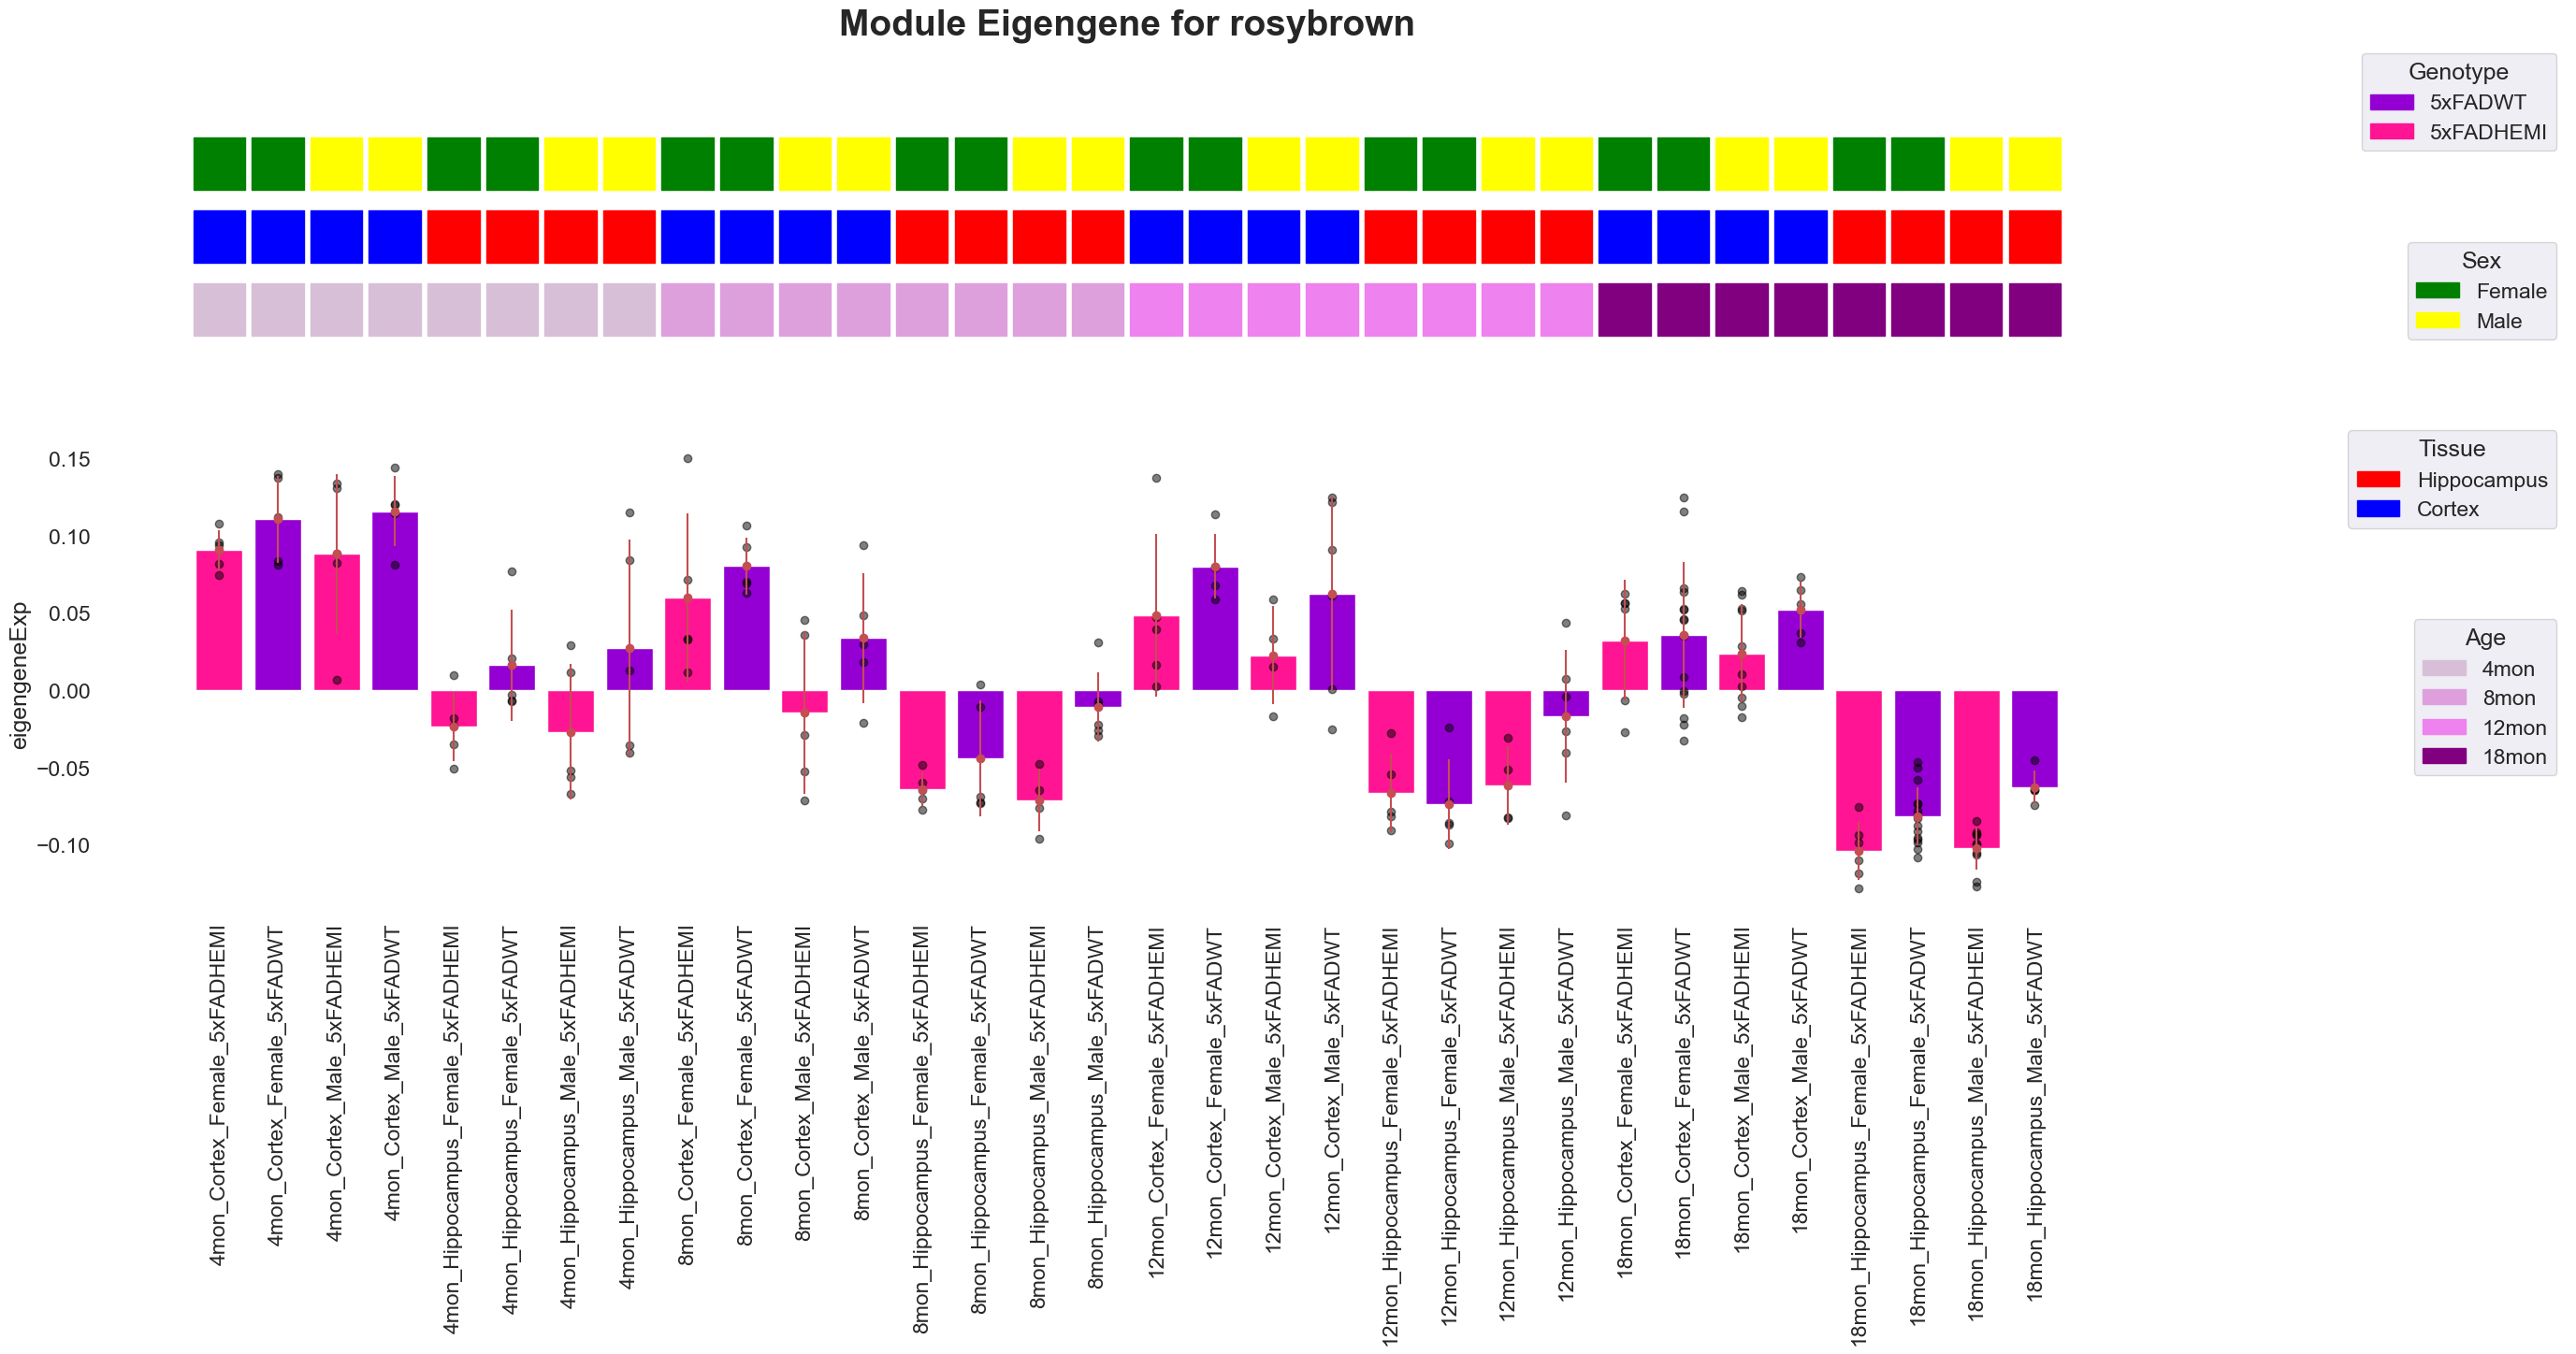

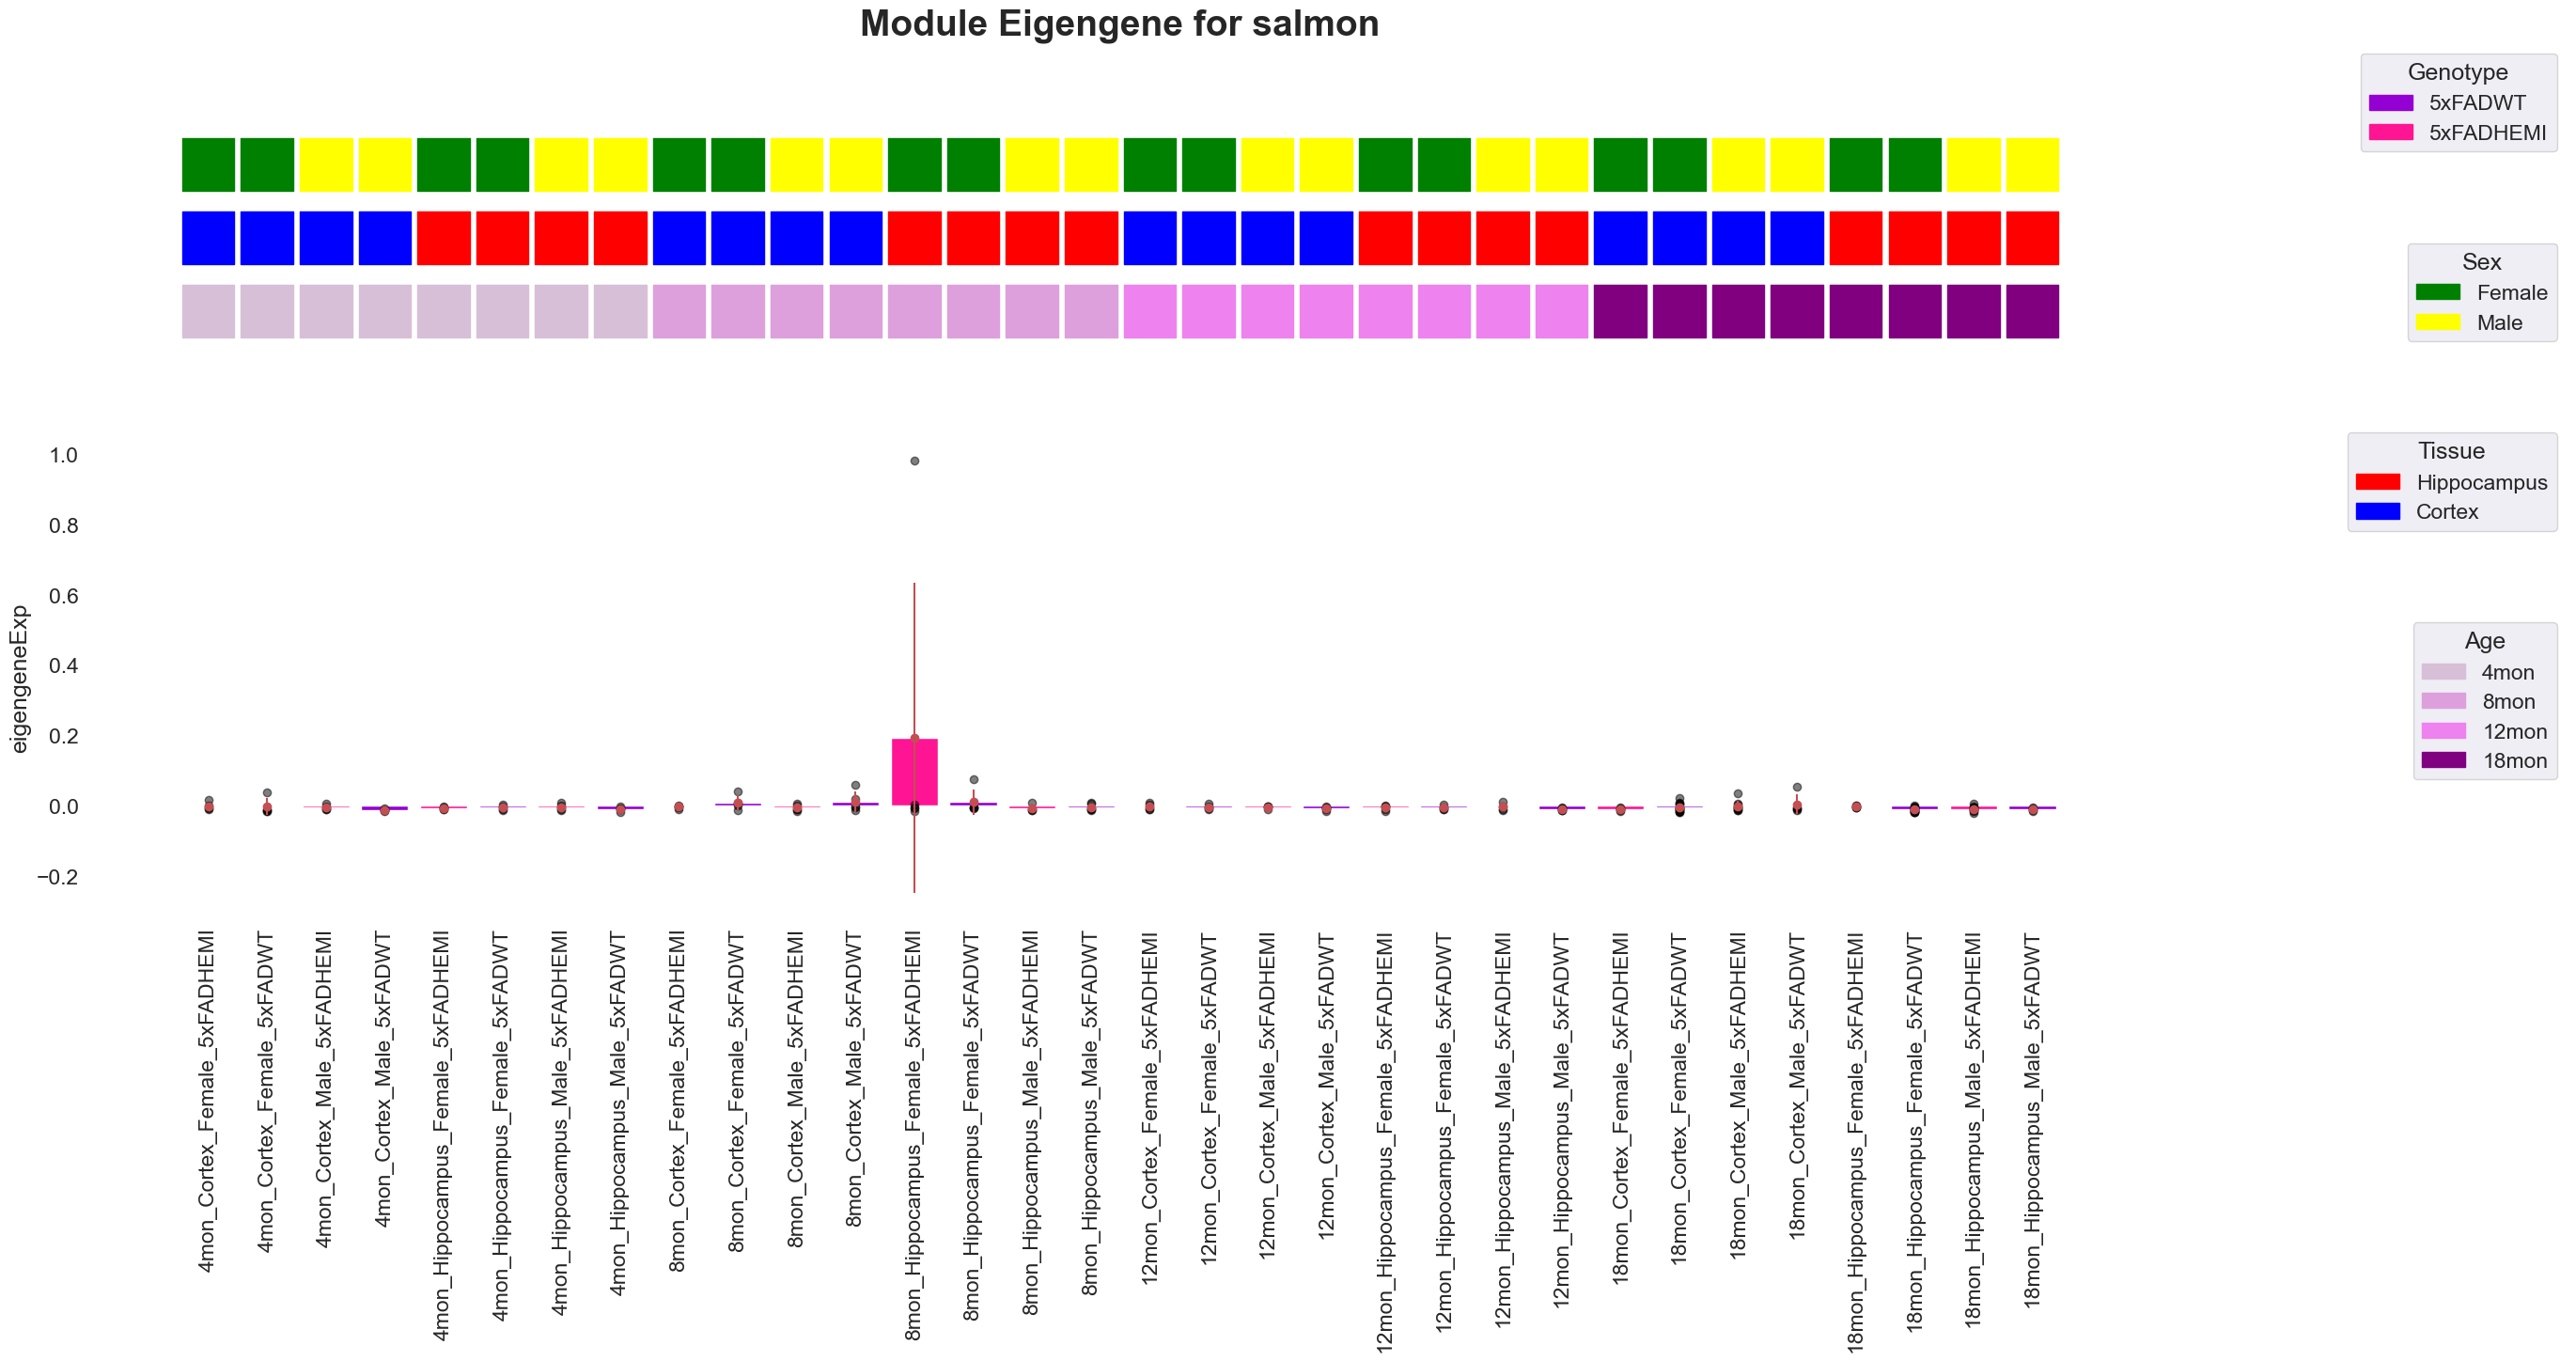

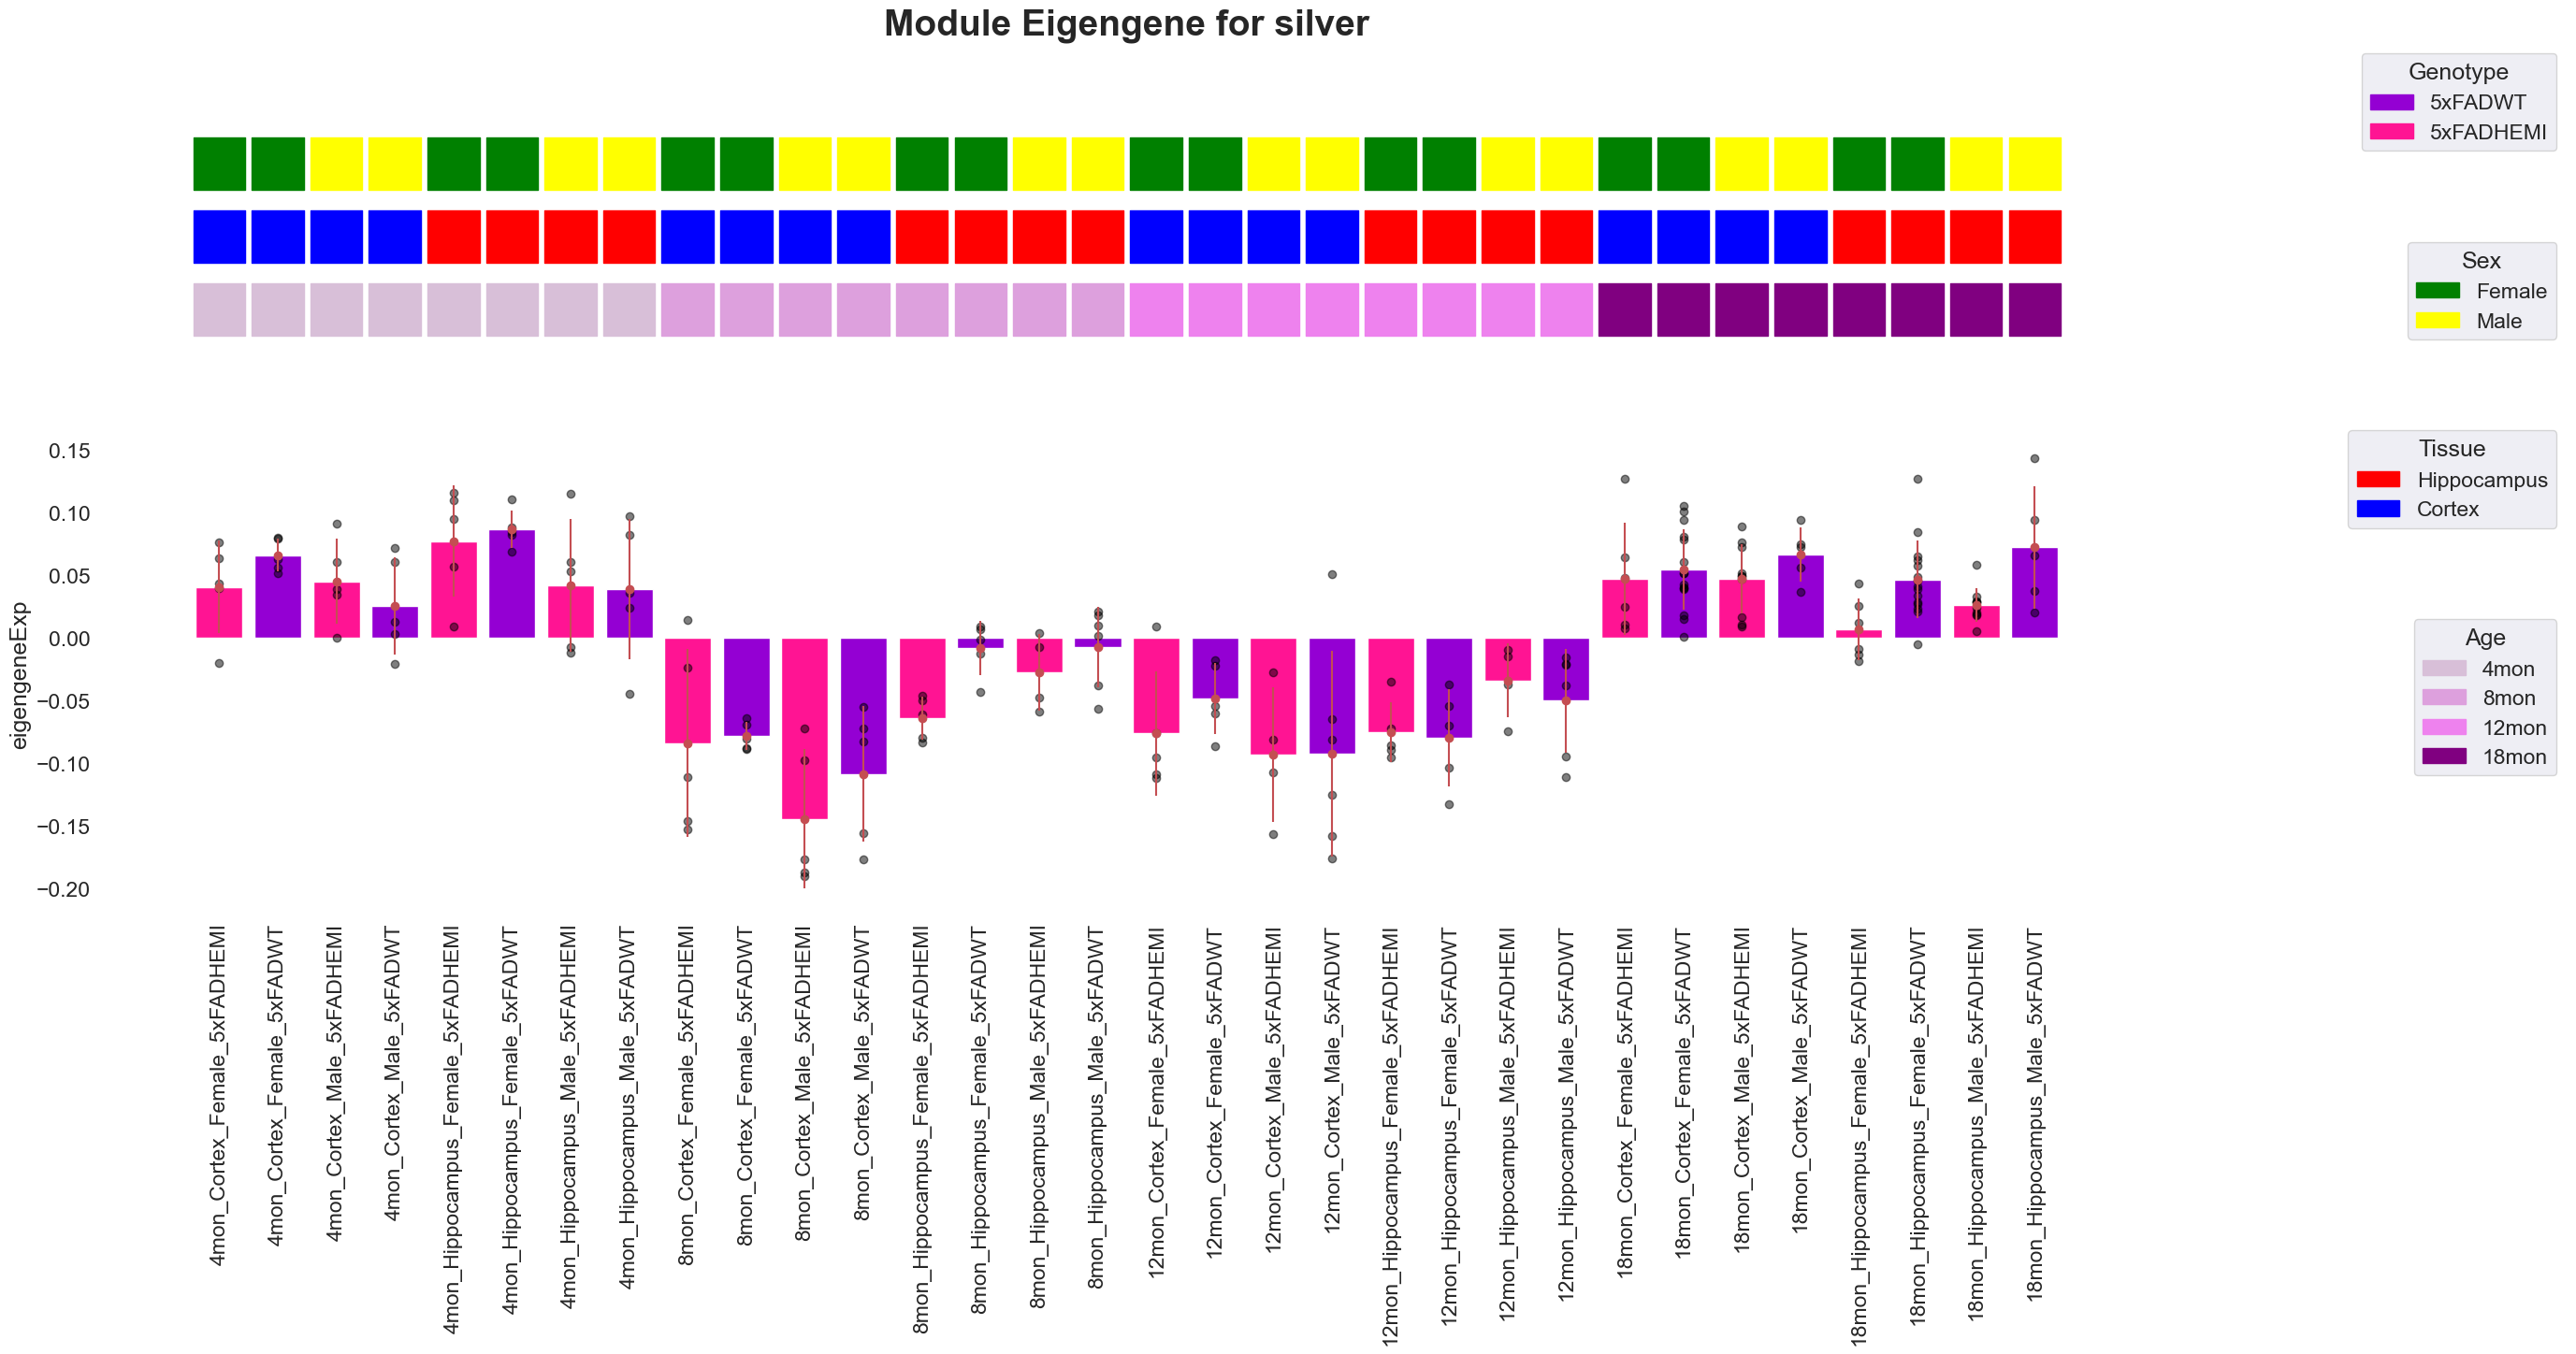

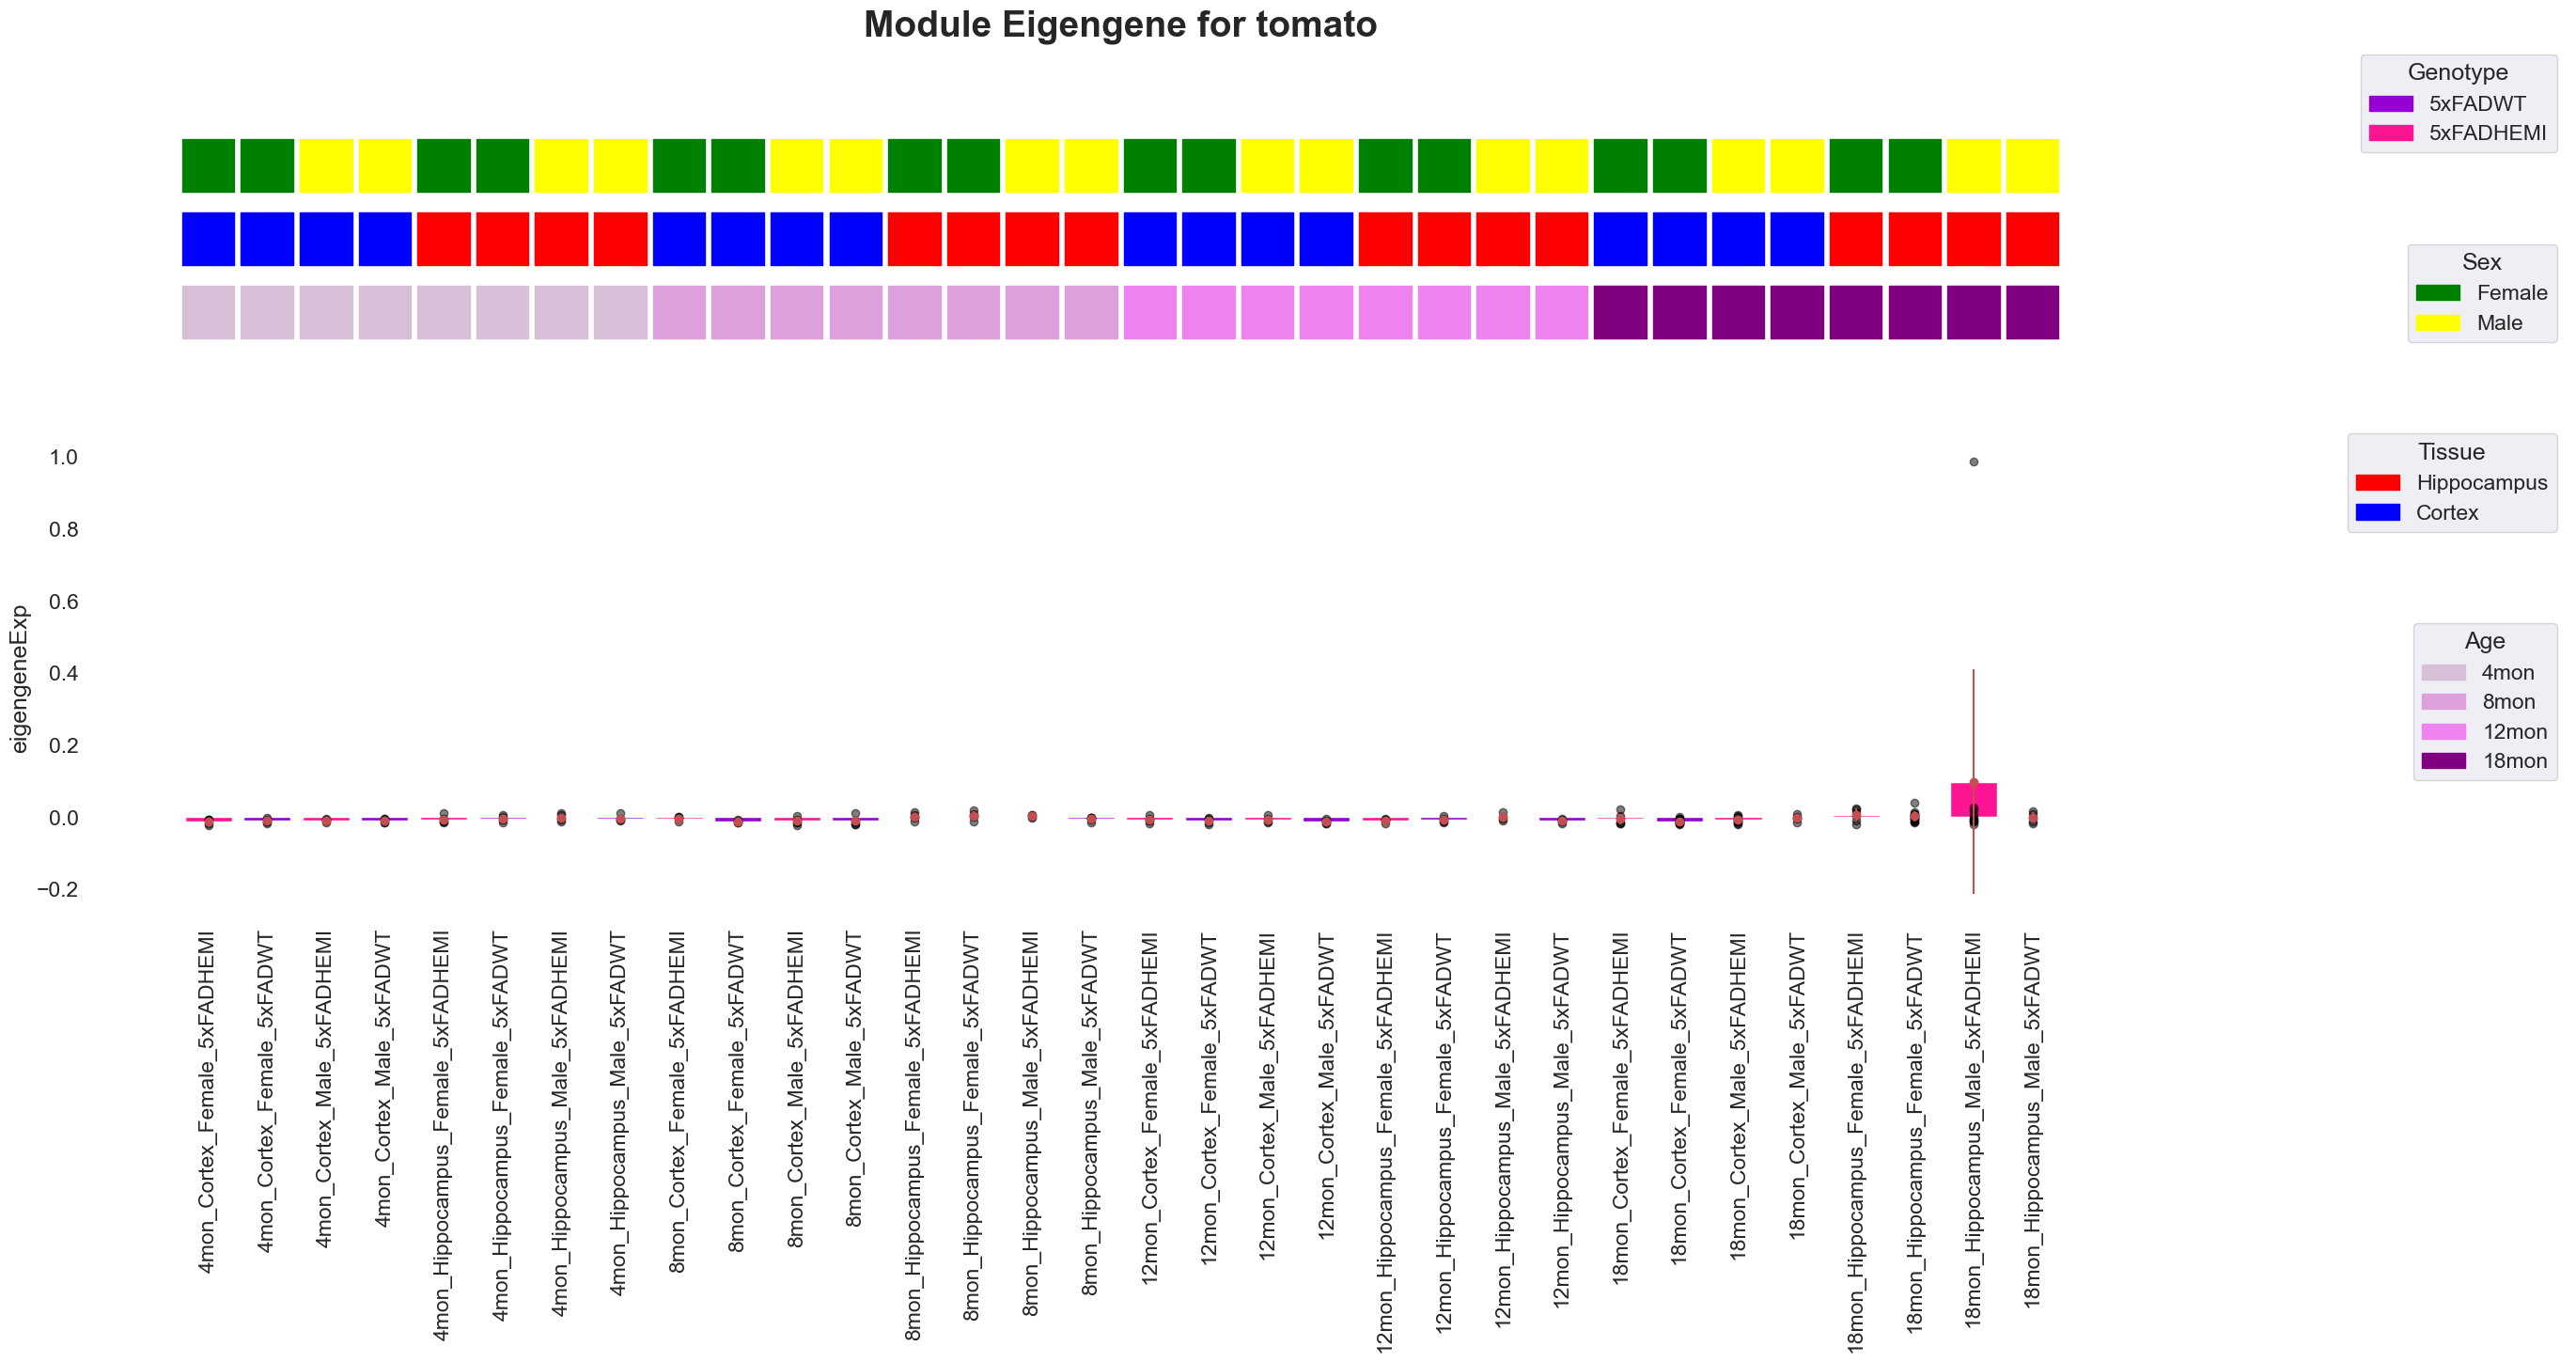

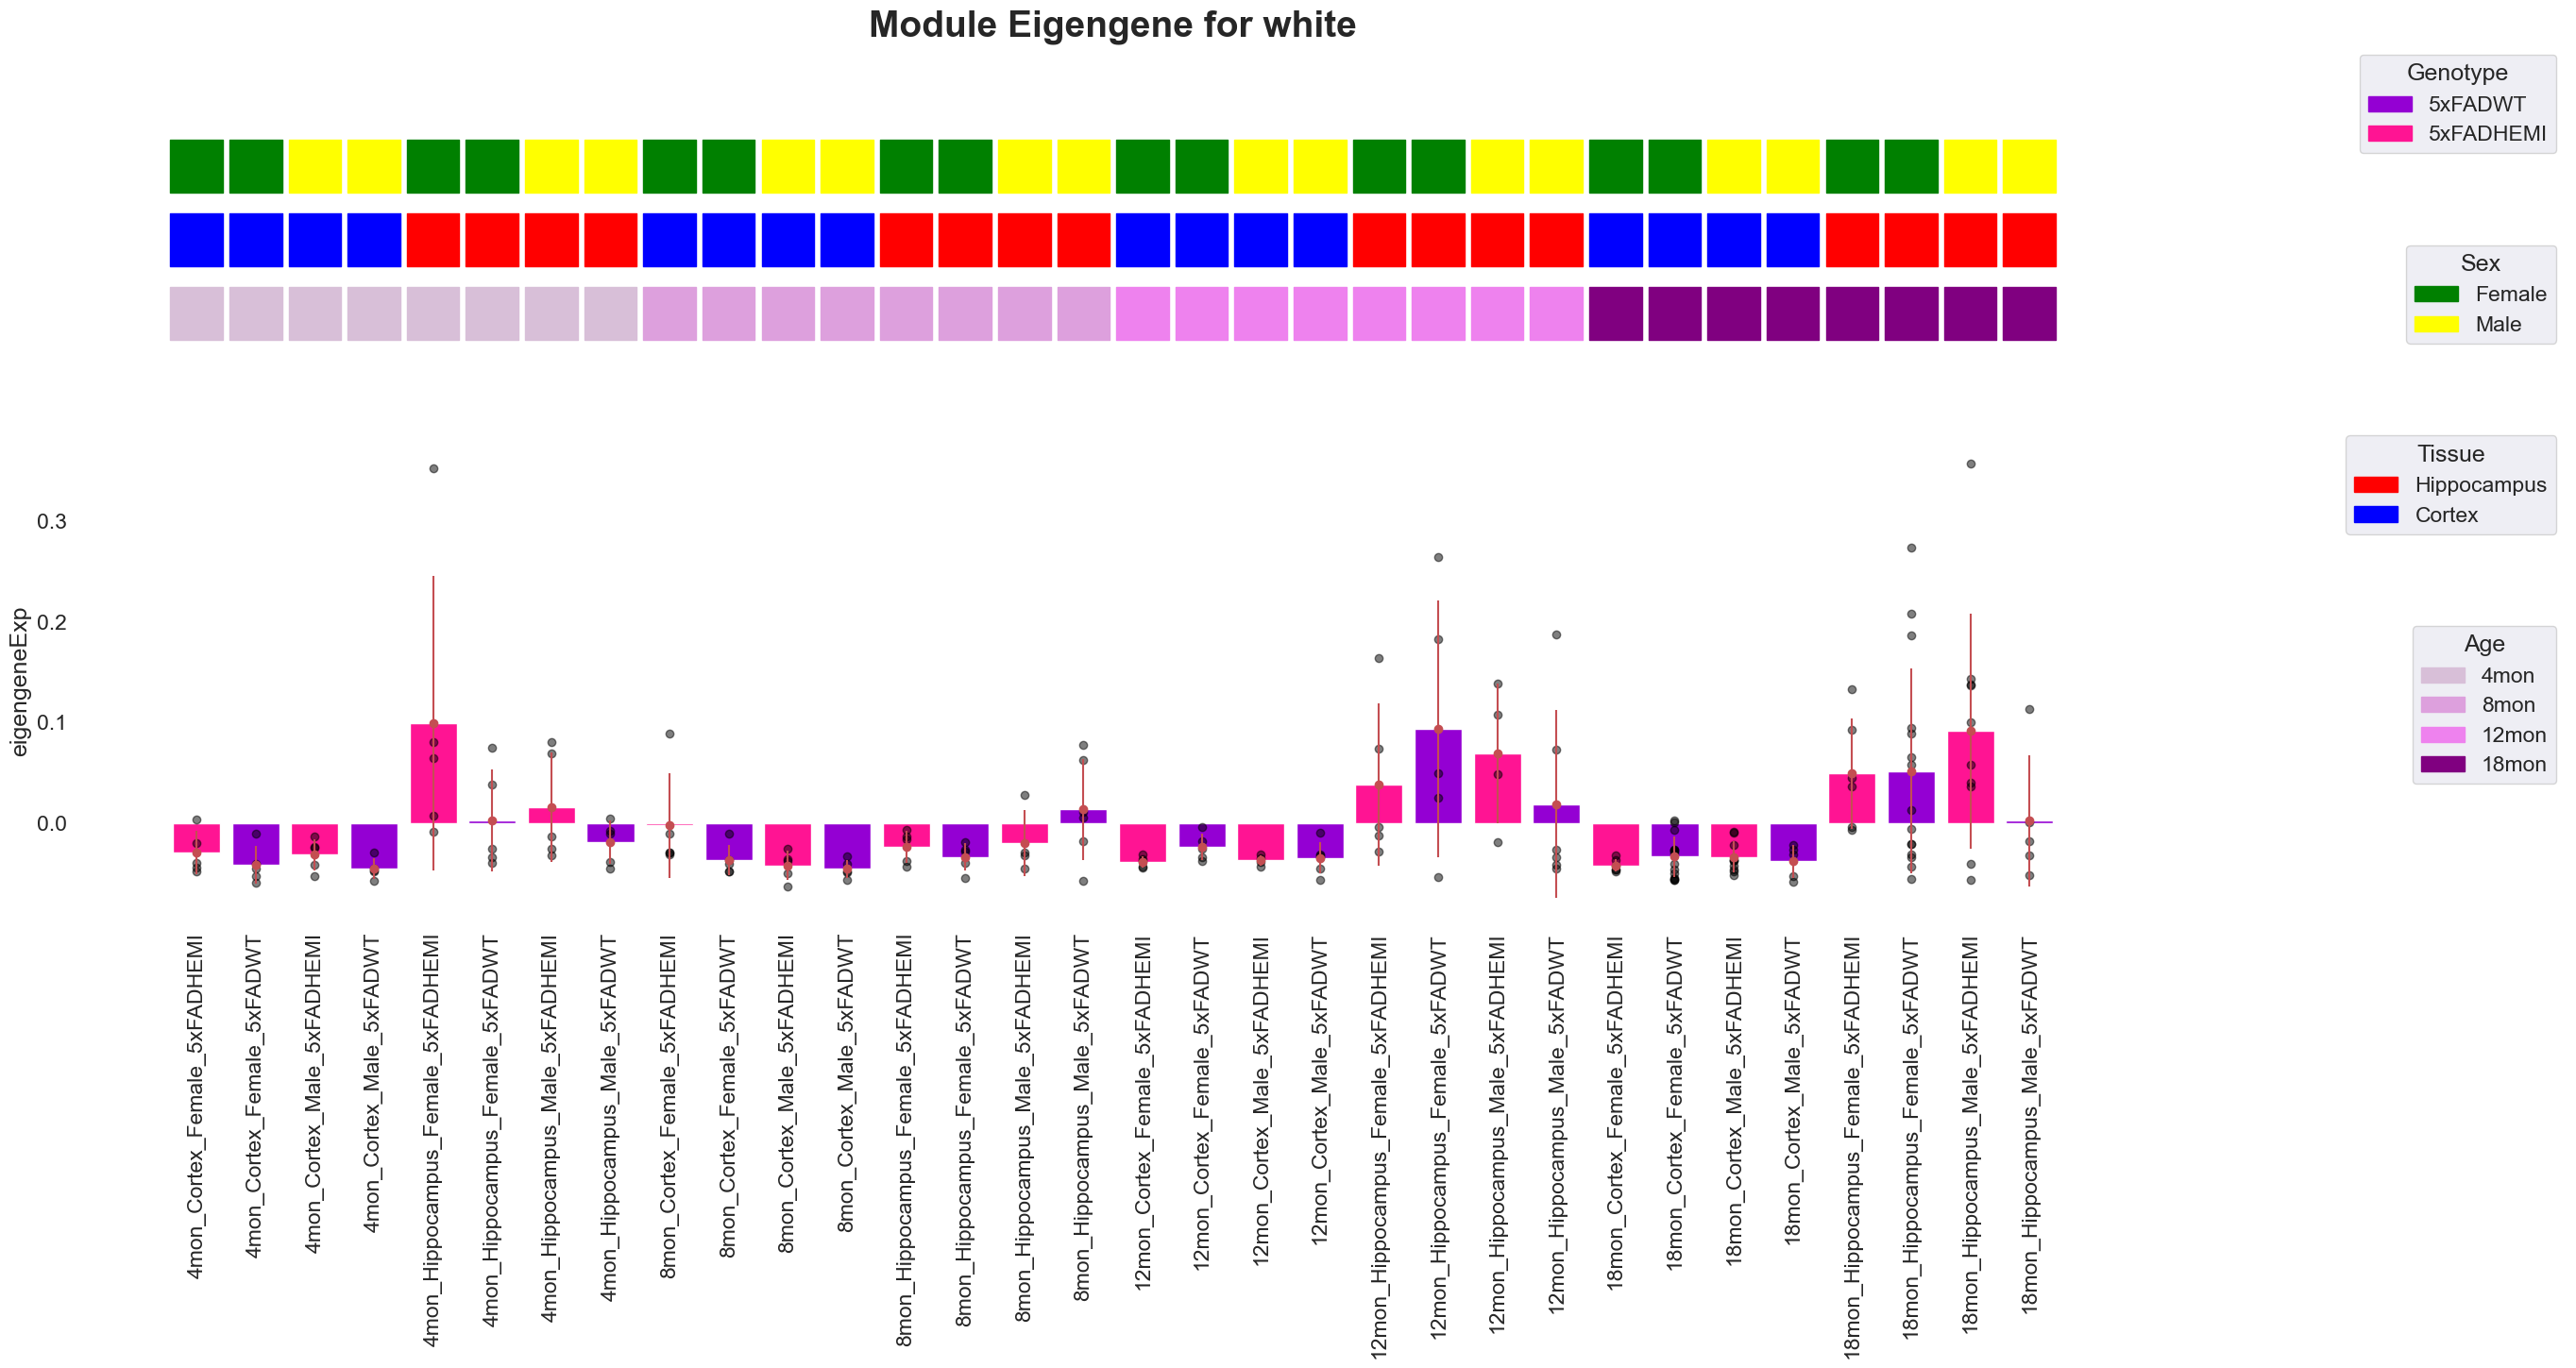

In [16]:
pyWGCNA_5xFAD.analyseWGCNA()

## Saving and loading your PyWGCNA
You can save or load your PyWGCNA object with the `saveWGCNA()` or `readWGCNA()` functions respectively.

In [17]:
pyWGCNA_5xFAD.saveWGCNA()

Saving WGCNA as 5xFAD.p


you can also load your PyWGCNA object with `readWGCNA()` function. you can download `5xFAD.p` from [Zendo](https://zenodo.org/record/6672453#.YrDS4LnMJhE).

In [1]:
import PyWGCNA
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")

Reading 5xFAD WGCNA done!


## Finding hub genes for each modules

you can also ask about hub genes in each modules based on their connectivity by using `top_n_hub_genes()` function.

It will give you dataframe sorted by connectivity with additional gene information you have in your expression data.

In [2]:
pyWGCNA_5xFAD.top_n_hub_genes(moduleName="coral", n=10)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels  \
ENSMUSG00000036905    142.377573         coral        coral           2.0   
ENSMUSG00000038642    138.650423         coral        coral           2.0   
ENSMUSG00000021665    135.848010         coral        coral           2.0   
ENSMUSG00000036896    134.358785         coral        coral           2.0   
ENSMUSG00000000290    134.030810         coral        coral           2.0   
ENSMUSG00000058715    132.936331         coral        coral           2.0   
ENSMUSG00000030124    131.812832         coral        coral           2.0   
ENSMUSG00000064267    130.008128         coral        coral           2.0   
ENSMUSG00000021423    129.823492         coral        coral           2.0   
ENSMUSG00000030798    128.650323         coral        coral           2.0   

                   gene_name    gene_biotype  
ENSMUSG00000036905      C1qb  protein_coding  
ENSMUSG00000038642      Ctss  protein_coding  
ENSMUSG00000021665      Hexb  protein_coding  
ENSMUSG00000036896      C1qc  protein_coding  
ENSMUSG00000000290     Itgb2  protein_coding  
ENSMUSG00000058715    Fcer1g  protein_coding  
ENSMUSG00000030124      Lag3  protein_coding  
ENSMUSG00000064267     Hvcn1  protein_coding  
ENSMUSG00000021423      Ly86  protein_coding  
ENSMUSG00000030798      Cd37  protein_coding